# Prueba Fundamentos Data Science

# Alumno: Nicolás Ramírez (Grupo con Eduardo Álvarez) 

# Determinantes del Ingreso

## Enunciado Usted trabaja para un organismo no gubernamental que está interesado en las dinámicas socioeconómicas que determinan la desigualdad de ingreso y la erradicación de la pobreza extrema,  enmarcado dentro de los objetivos del desarrollo del nuevo milenio del Programa de las Naciones Unidas para el Desarrollo. Le encomiendan el desarrollo de un modelo predictivo sobre la probabilidad que un individuo presente salarios por sobre o bajo los 50.000 dólares anuales, en basea una serie de atributos sociodemográficos

# Preliminar

* Nos asignan realizar un modelo predictivo que nos permita determinar si un individuo, en base a sus atributos sociodemográficos, tendrá un salario sobre o bajo los $50.000 anuales.

* Como estamos buscando un modelo que pueda predecir en base a 2 opciones, es decir si el salario es sobre o bajo los $50.000 anuales, es que se aplicará un análisis mediante una regresión logística ya que es un problema de clasificación.

* Primero realizaremos un análisis exploratorio de la base, revisando la cantidad de datos, datos nulos, las características de las diversas variables, y procederemos a recodificar y binarizar las variables que correspondan que nos facilitará el análisis.

* Posteriormente realizaremos una modelación descriptiva de forma poder identificar las variables que tengan mayor porcentaje explicativo en relación a la variable objetivo, por lo tanto descartaremos las que no sean relevantes.

* Finalmente mediante un modelo de Regresión Logística, entrenaremos un modelo que nos permita hacer la predicción en base a los atributos sociodemográficos que sean más relevantes.

* Evaluaremos el modelo analizando la matriz de confusión y Roc Curve AUC ya que son las que nos permitirán determinar para el caso de un modelo predictivo de Regrsión Logística, el comportamiento de nuestro modelo con los valores verídicos, por lo tanto podremos ver que tan certero es nuestro modelo.

# Aspectos Computacionales

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler


import missingno as msno
import helpers_prueba as hp


* Pandas para poder trabajar con Dataframes
* Numpy nos permite realizar operaciones con los Dataframes. Tiene mayor funcionalidades que las operaciones disponibles en Pandas
* Matplotlib y Seaborn nos permiten realizar gráficos
* scipy.stats sirve para poder utilizar funciones estadísticas y distribuciones de probabilidad
* statsmodels nos ayuda para realizar el análisis y modelación descriptiva
* sklearn nos ayuda para poder realizar finalmente el modelo predictivo
* missingno nos ayuda a visualizar lo NaN
* helpers_prueba nos entrega alguna funciones que sirven para complementar las librería previamente definidas


Leemos el la base, y vemos alguna información como cantidad de columnas, filas, tipo de variables, presencia de valores NaN y las 5 primeras filas.

In [2]:
df = pd.read_csv('income-db.csv')

In [3]:
df.shape

(48842, 15)

In [4]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


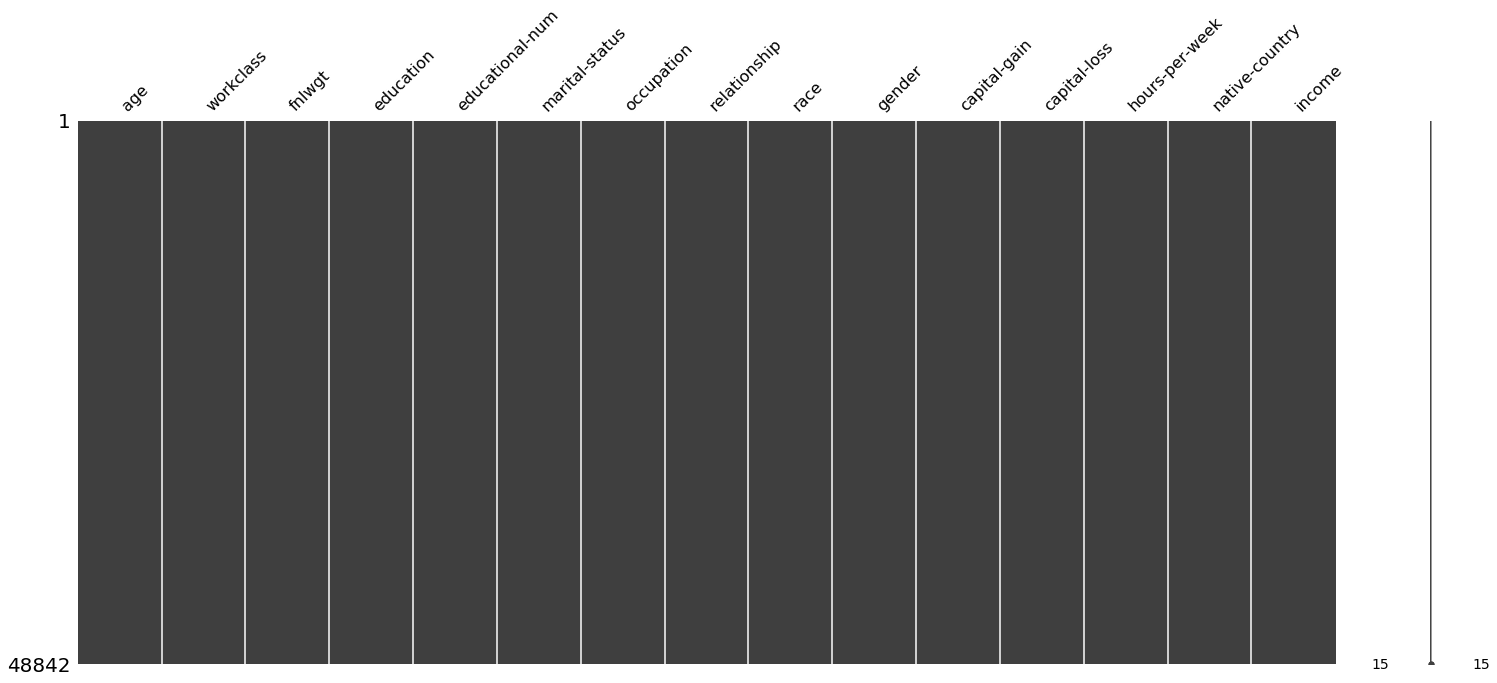

In [7]:
msno.matrix(df)

No hay valores NaN, sin embargo hay valores con el caracter '?' que procederemos a reemplazar por NaN

In [8]:
columnas = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']
for i in columnas:
    df[i] = df[i].replace(['?'], [None])

Probé haciendo un for con todas las columnas, sin embargo el replace me entrega error para las variable type 'int'

Además las columnas que son type 'int' al revisarlas individualmente, no presentan datos perdidos o nulos.

Entonces se reemplazan los '?' por None de manera que queden como NaN

In [9]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,None,103497,Some-college,10,Never-married,None,Own-child,White,Female,0,0,30,United-States,<=50K


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          46043 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         46033 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     47985 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


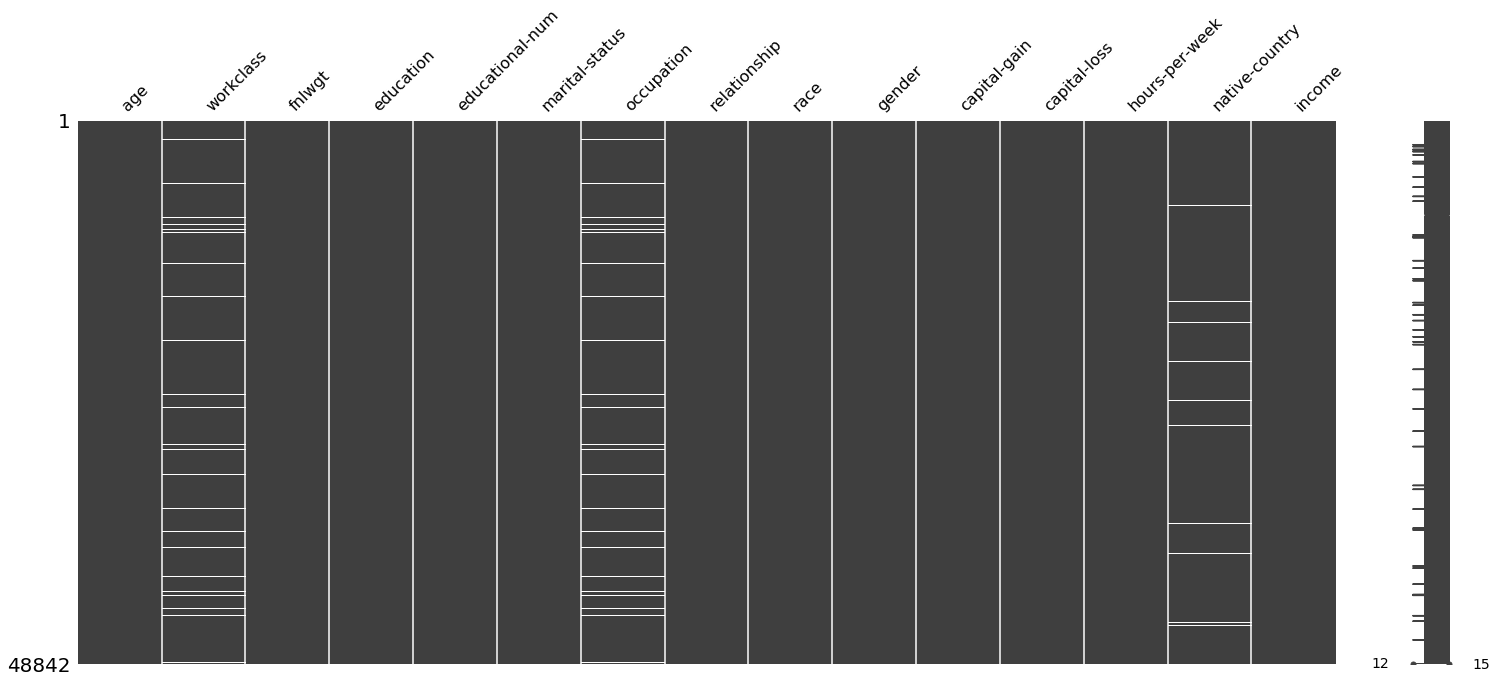

In [11]:
msno.matrix(df) 

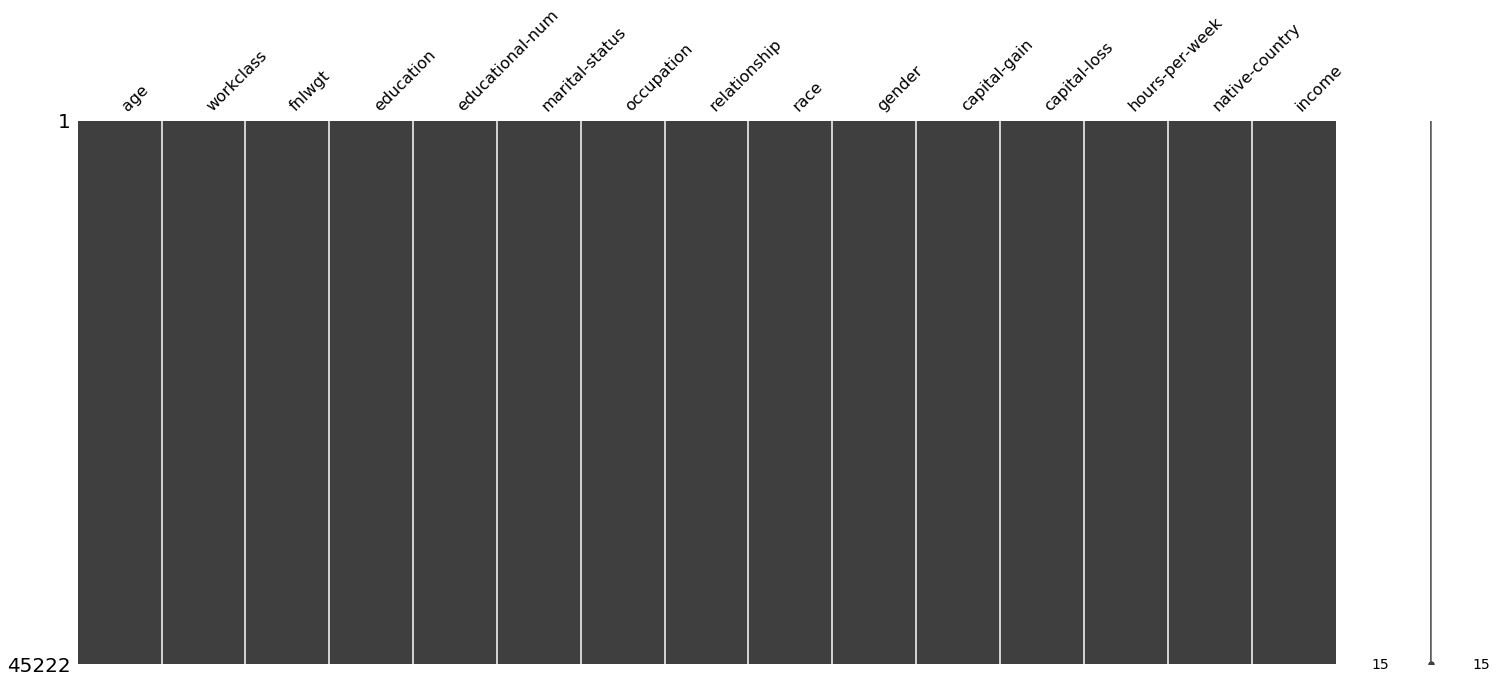

In [12]:
msno.matrix(df.dropna()) 

Ahora sí podemos ver que existen valores NaN, que en total corresponden a 3.620 filas que tiene al menos una variable con un valor NaN, que corresponde al 7,41 % del total de los datos.

Para el futuro análisis consideraremos realizar un análisis eliminando estos datos, y otro análisis considerando estos datos donde al binarizar quedarán siempre considerados como valor '0'.

Considero que la cantidad de datos con valores perdidos es lo suficientemente bajo para poder descartarlos, sin embargo también es lo suficientemente alto como para que puedan resultar significativos, entonces compararemos este comportamiento.


Comenzaremos recodificando y binarizando variable objetivo.

In [13]:
df['collars'] = df['occupation'].replace(['Prof-specialty', 'Exec-managerial', 'Adm-clerical', 'Sales', 'Tech-support'],
                                        'white-collar').replace(['Craft-repair', 'Machine-op-inspct', 'Transport-moving', 
                                                                 'Handlers-cleaners', 'Farming-fishing', 'Protective-serv', 
                                                                 'Priv-house-serv'], 'blue-collar').replace(['Other-service', 
                                                                                                            'Armed-Forces'], 'others')

In [14]:
df['workclass_recod'] = df['workclass'].replace('Federal-gov', 'federal-gov').replace(['State-gov', 'Local-gov'], 
                        'state-level-gov').replace(['Self-emp-inc', 'Self-emp-not-inc'], 
                                                   'self-employed').replace(['Never-worked', 'Without-pay'], 'unemployed')

In [15]:
df["educ_recod"] = df["education"].replace("Preschool", "preschool").replace(["1st-4th", "5th-6th"], "elementary-school").replace(
                                   ["7th-8th", "9th", "10th", "11th", "12th", "HS-grad"], "high-school").replace(["Assoc-voc",
                                           "Assoc-acdm", "Some-college"], "college").replace(["Bachelors", "Masters", "Prof-school",
                                                   "Doctorate"], "university")

In [16]:
df['civstatus'] = df['marital-status'].replace(['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'], 
                    'married').replace('Divorced', 'divorced').replace('Separated', 'separated').replace('Widowed', 
                                                                                                        'widowed')

In [17]:
df['native-country'].unique()

array(['United-States', None, 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [18]:
df['region'] = df['native-country'].replace(['United-States', 'Peru', 'Guatemala', 'Mexico', 'Dominican-Republic',
                'Haiti', 'El-Salvador', 'Puerto-Rico', 'Columbia', 'Cuba', 'Canada', 'Nicaragua', 'Honduras',
                'Jamaica', 'Ecuador', 'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)'], 'america').replace(['Ireland',
                'Germany', 'Poland', 'England', 'Italy', 'Portugal', 'Scotland', 'Yugoslavia', 'Hungary', 'Greece', 
                'France', 'Holand-Netherlands'], 'europe').replace(['Philippines', 'Thailand', 'Vietnam', 'South', 
                'Japan', 'India', 'Cambodia', 'Laos', 'Taiwan', 'China', 'Iran','Hong'], 'asia')

In [19]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [20]:
df['income_bin'] = np.where(df['income'] == '>50K',1,0)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 21 columns):
age                48842 non-null int64
workclass          46043 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         46033 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     47985 non-null object
income             48842 non-null object
collars            46033 non-null object
workclass_recod    46043 non-null object
educ_recod         48842 non-null object
civstatus          48842 non-null object
region             47985 non-null object
income_bin         48842 non-null int32
dtypes: int32(1), int64(6), object(14

In [22]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,...,capital-loss,hours-per-week,native-country,income,collars,workclass_recod,educ_recod,civstatus,region,income_bin
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,...,0,40,United-States,<=50K,blue-collar,Private,high-school,Never-married,america,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,...,0,50,United-States,<=50K,blue-collar,Private,high-school,married,america,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,...,0,40,United-States,>50K,blue-collar,state-level-gov,college,married,america,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,...,0,40,United-States,>50K,blue-collar,Private,college,married,america,1
4,18,None,103497,Some-college,10,Never-married,None,Own-child,White,Female,...,0,30,United-States,<=50K,None,None,college,Never-married,america,0


Ahora dejaremos una base con NaN, y otra base descartando todas las filas con al menos un valor NaN.

In [23]:
df_dropna = df.dropna()

In [24]:
df['collars'].value_counts()

white-collar    24819
blue-collar     16276
others           4938
Name: collars, dtype: int64

In [25]:
df['collars_bin_others'] = np.where(df['collars'] == 'others' , 1, 0)
df['collars_bin_bluecollar'] = np.where(df['collars'] == 'blue-collar' , 1, 0)

df_dropna['collars_bin_others'] = np.where(df_dropna['collars'] == 'others' , 1, 0)
df_dropna['collars_bin_bluecollar'] = np.where(df_dropna['collars'] == 'blue-collar' , 1, 0)

In [26]:
df['workclass_recod'].value_counts('%')

Private            0.736399
self-employed      0.120692
state-level-gov    0.111135
federal-gov        0.031101
unemployed         0.000673
Name: workclass_recod, dtype: float64

In [27]:
df['workclass_recod_bin_unemployed'] = np.where(df['workclass_recod'] == 'unemployed' , 1, 0)
df['workclass_recod_bin_federal_gov'] = np.where(df['workclass_recod'] == 'federal-gov' , 1, 0)
df['workclass_recod_bin_state_level_gov'] = np.where(df['workclass_recod'] == 'state-level-gov' , 1, 0)
df['workclass_recod_bin_self_employed'] = np.where(df['workclass_recod'] == 'self-employed' , 1, 0)

df_dropna['workclass_recod_bin_unemployed'] = np.where(df_dropna['workclass_recod'] == 'unemployed' , 1, 0)
df_dropna['workclass_recod_bin_federal_gov'] = np.where(df_dropna['workclass_recod'] == 'federal-gov' , 1, 0)
df_dropna['workclass_recod_bin_state_level_gov'] = np.where(df_dropna['workclass_recod'] == 'state-level-gov' , 1, 0)
df_dropna['workclass_recod_bin_self_employed'] = np.where(df_dropna['workclass_recod'] == 'self-employed' , 1, 0)


In [28]:
df['educ_recod'].value_counts()

high-school          21353
college              14540
university           12110
elementary-school      756
preschool               83
Name: educ_recod, dtype: int64

In [29]:
df['educ_recod_bin_preschool'] = np.where(df['educ_recod'] == 'preschool' , 1, 0)
df['educ_recod_bin_elementary_school'] = np.where(df['educ_recod'] == 'elementary-school' , 1, 0)
df['educ_recod_bin_university'] = np.where(df['educ_recod'] == 'university' , 1, 0)
df['educ_recod_bin_college'] = np.where(df['educ_recod'] == 'college' , 1, 0)

df_dropna['educ_recod_bin_preschool'] = np.where(df_dropna['educ_recod'] == 'preschool' , 1, 0)
df_dropna['educ_recod_bin_elementary_school'] = np.where(df_dropna['educ_recod'] == 'elementary-school' , 1, 0)
df_dropna['educ_recod_bin_university'] = np.where(df_dropna['educ_recod'] == 'university' , 1, 0)
df_dropna['educ_recod_bin_college'] = np.where(df_dropna['educ_recod'] == 'college' , 1, 0)

In [30]:
df['civstatus'].value_counts()

married          23044
Never-married    16117
divorced          6633
separated         1530
widowed           1518
Name: civstatus, dtype: int64

In [31]:
df['civstatus_bin_widowed'] = np.where(df['civstatus'] == 'widowed' , 1, 0)
df['civstatus_bin_separated'] = np.where(df['civstatus'] == 'separated' , 1, 0)
df['civstatus_bin_divorced'] = np.where(df['civstatus'] == 'divorced' , 1, 0)
df['civstatus_bin_Never_married'] = np.where(df['civstatus'] == 'Never-married' , 1, 0)

df_dropna['civstatus_bin_widowed'] = np.where(df_dropna['civstatus'] == 'widowed' , 1, 0)
df_dropna['civstatus_bin_separated'] = np.where(df_dropna['civstatus'] == 'separated' , 1, 0)
df_dropna['civstatus_bin_divorced'] = np.where(df_dropna['civstatus'] == 'divorced' , 1, 0)
df_dropna['civstatus_bin_Never_married'] = np.where(df_dropna['civstatus'] == 'Never-married' , 1, 0)

In [32]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'collars', 'workclass_recod', 'educ_recod', 'civstatus',
       'region', 'income_bin', 'collars_bin_others', 'collars_bin_bluecollar',
       'workclass_recod_bin_unemployed', 'workclass_recod_bin_federal_gov',
       'workclass_recod_bin_state_level_gov',
       'workclass_recod_bin_self_employed', 'educ_recod_bin_preschool',
       'educ_recod_bin_elementary_school', 'educ_recod_bin_university',
       'educ_recod_bin_college', 'civstatus_bin_widowed',
       'civstatus_bin_separated', 'civstatus_bin_divorced',
       'civstatus_bin_Never_married'],
      dtype='object')

In [33]:
df['relationship'].value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

In [34]:
df['relationship_bin_other_relative'] = np.where(df['relationship'] == 'Other-relative' , 1, 0)
df['relationship_bin_wife'] = np.where(df['relationship'] == 'Wife' , 1, 0)
df['relationship_bin_unmarried'] = np.where(df['relationship'] == 'Unmarried' , 1, 0)
df['relationship_bin_own_child'] = np.where(df['relationship'] == 'Own-child' , 1, 0)
df['relationship_bin_not_in_family'] = np.where(df['relationship'] == 'Not-in-family' , 1, 0)

df_dropna['relationship_bin_other_relative'] = np.where(df_dropna['relationship'] == 'Other-relative' , 1, 0)
df_dropna['relationship_bin_wife'] = np.where(df_dropna['relationship'] == 'Wife' , 1, 0)
df_dropna['relationship_bin_unmarried'] = np.where(df_dropna['relationship'] == 'Unmarried' , 1, 0)
df_dropna['relationship_bin_own_child'] = np.where(df_dropna['relationship'] == 'Own-child' , 1, 0)
df_dropna['relationship_bin_not_in_family'] = np.where(df_dropna['relationship'] == 'Not-in-family' , 1, 0)

In [35]:
df['race'].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [36]:
df['race_bin_other'] = np.where(df['race'] == 'Other' , 1, 0)
df['race_bin_aie'] = np.where(df['race'] == 'Amer-Indian-Eskimo' , 1, 0)
df['race_bin_api'] = np.where(df['race'] == 'Asian-Pac-Islander' , 1, 0)
df['race_bin_black'] = np.where(df['race'] == 'Black' , 1, 0)

df_dropna['race_bin_other'] = np.where(df_dropna['race'] == 'Other' , 1, 0)
df_dropna['race_bin_aie'] = np.where(df_dropna['race'] == 'Amer-Indian-Eskimo' , 1, 0)
df_dropna['race_bin_api'] = np.where(df_dropna['race'] == 'Asian-Pac-Islander' , 1, 0)
df_dropna['race_bin_black'] = np.where(df_dropna['race'] == 'Black' , 1, 0)

In [37]:
df['gender'].value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

In [38]:
df['gender_bin'] = np.where(df['gender'] == 'Female' , 1, 0)

df_dropna['gender_bin'] = np.where(df_dropna['gender'] == 'Female' , 1, 0)

In [39]:
df['region'].value_counts()

america    46109
asia        1096
europe       780
Name: region, dtype: int64

In [40]:
df['region_bin_europe'] = np.where(df['region'] == 'europe' , 1, 0)
df['region_bin_asia'] = np.where(df['region'] == 'asia' , 1, 0)

df_dropna['region_bin_europe'] = np.where(df_dropna['region'] == 'europe' , 1, 0)
df_dropna['region_bin_asia'] = np.where(df_dropna['region'] == 'asia' , 1, 0)

Completamos la binarización de todas las variables.

# Descripción

In [41]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

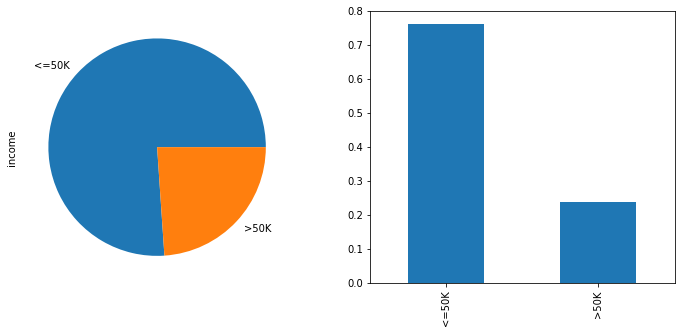

<=50K    0.760718
>50K     0.239282
Name: income, dtype: float64


In [42]:
plt.figure(figsize=(12,5))  
plt.subplot(1,2,1) 
df['income'].value_counts("%").plot(kind='pie')  
plt.subplot(1,2,2) 
df['income'].value_counts("%").plot(kind='bar') 
plt.show()  
print(df['income'].value_counts('%'))

Del total tenemos un 76,07% de registros que tienen un sueldo menor a $50K al año.

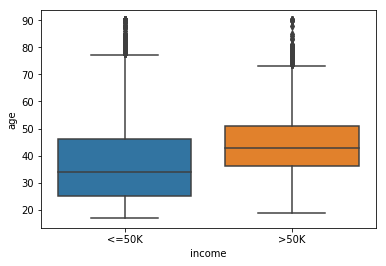

36    0.027599
35    0.027374
33    0.027333
23    0.027210
31    0.027128
        ...   
88    0.000123
85    0.000102
87    0.000061
89    0.000041
86    0.000020
Name: age, Length: 74, dtype: float64


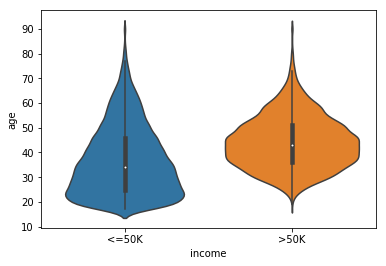

In [43]:
sns.boxplot(x=df['income'], y=df['age'])
plt.show()
sns.violinplot(x=df['income'], y=df['age'])
print(df['age'].value_counts('%'))

Analizando Income vs Age, visualmente se aprecia una diferencia, donde pareciera ser que a mayor edad, mayores son los casos donde los ingresos son mayores a $50K. Entonces puede ser una variable significativa.

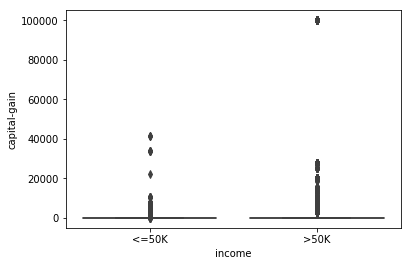

0        0.917387
15024    0.010503
7688     0.008394
7298     0.007453
99999    0.004996
           ...   
2387     0.000020
22040    0.000020
6612     0.000020
1111     0.000020
1639     0.000020
Name: capital-gain, Length: 123, dtype: float64
0        44807
15024      513
7688       410
7298       364
99999      244
         ...  
2387         1
22040        1
6612         1
1111         1
1639         1
Name: capital-gain, Length: 123, dtype: int64


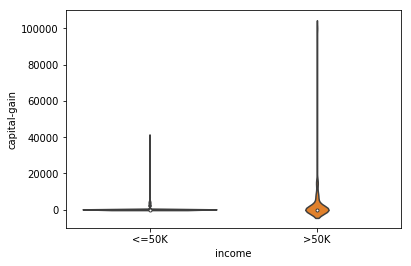

In [44]:
sns.boxplot(x=df['income'], y=df['capital-gain'])
plt.show()
sns.violinplot(x=df['income'], y=df['capital-gain'])
print(df['capital-gain'].value_counts('%'))
print(df['capital-gain'].value_counts())

Analizando Income vs Capital Gain, visualmente es difícil evaluar ya que el 91,7% de los datos son '0', por lo tanto es difícil determinar como impacta, aunque pareciera ser que a mayores valores de Capital gain hay más casos de registros mayor a $50K., pero es difícil llegar a alguna conclusión.

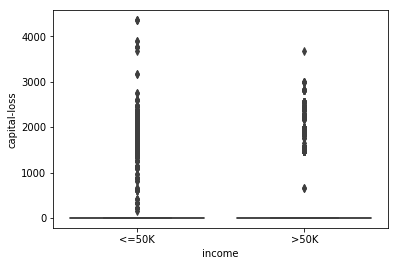

0        0.917387
15024    0.010503
7688     0.008394
7298     0.007453
99999    0.004996
           ...   
2387     0.000020
22040    0.000020
6612     0.000020
1111     0.000020
1639     0.000020
Name: capital-gain, Length: 123, dtype: float64
0        44807
15024      513
7688       410
7298       364
99999      244
         ...  
2387         1
22040        1
6612         1
1111         1
1639         1
Name: capital-gain, Length: 123, dtype: int64


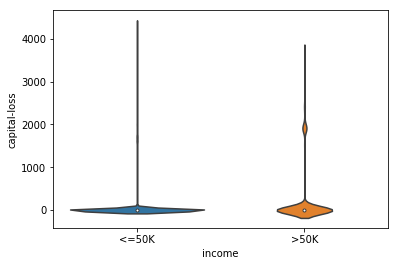

In [45]:
sns.boxplot(x=df['income'], y=df['capital-loss'])
plt.show()
sns.violinplot(x=df['income'], y=df['capital-loss'])
print(df['capital-gain'].value_counts('%'))
print(df['capital-gain'].value_counts())

Analizando Income vs Capital Loss, visualmente es difícil evaluar ya que el 91,7% de los datos son '0', por lo tanto es difícil determinar algo significativo en este caso.

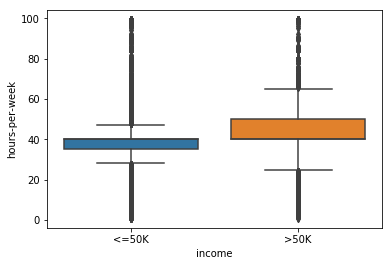

40    0.466873
50    0.086933
45    0.055628
60    0.044572
35    0.039658
        ...   
69    0.000020
94    0.000020
79    0.000020
82    0.000020
87    0.000020
Name: hours-per-week, Length: 96, dtype: float64


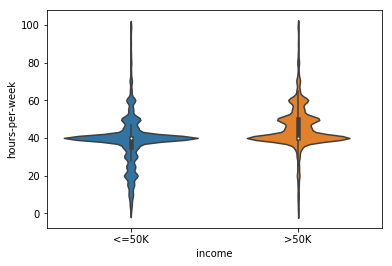

In [46]:
sns.boxplot(x=df['income'], y=df['hours-per-week'])
plt.show()
sns.violinplot(x=df['income'], y=df['hours-per-week'])
print(df['hours-per-week'].value_counts('%'))

Analizando Income vs Hours Per Week, visualmente se aprecia una diferencia, donde a mayor horas trabajadas pareciera haber una tendencia de que con mayor contidad de hora hay más posibilidades de tener un ingreso sobre los 50K. Y lo otro que se ve importante es que para horas trabajadas menor a 40 horas por semana son bastante menos los casos donde tienen ingresos sobre los 50K.
Y se ve una concentrarión en las 40 horas ya que el 46,6% trabaja 40 horas a la semana.


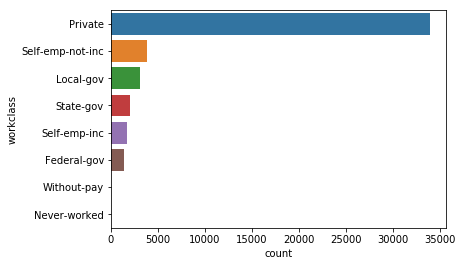

Private             0.736399
Self-emp-not-inc    0.083878
Local-gov           0.068110
State-gov           0.043025
Self-emp-inc        0.036813
Federal-gov         0.031101
Without-pay         0.000456
Never-worked        0.000217
Name: workclass, dtype: float64


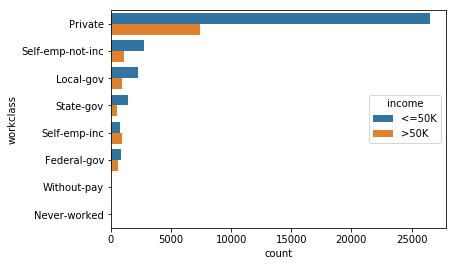

In [47]:
sns.countplot(y = df['workclass'], order = df['workclass'].value_counts().index)
plt.show()
sns.countplot(y = df['workclass'], hue = df['income'], order = df['workclass'].value_counts('%').index)
print(df['workclass'].value_counts('%'))

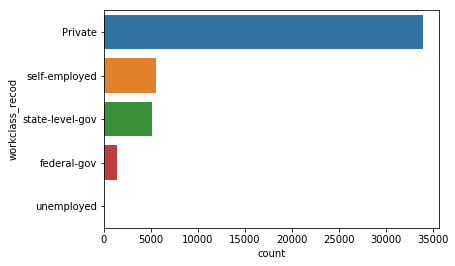

Private            0.736399
self-employed      0.120692
state-level-gov    0.111135
federal-gov        0.031101
unemployed         0.000673
Name: workclass_recod, dtype: float64


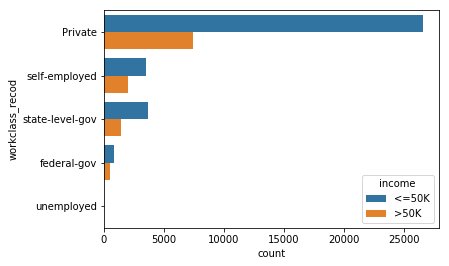

In [48]:
sns.countplot(y = df['workclass_recod'], order = df['workclass_recod'].value_counts().index)
plt.show()
sns.countplot(y = df['workclass_recod'], hue = df['income'], order = df['workclass_recod'].value_counts('%').index)
print(df['workclass_recod'].value_counts('%'))

Se ve que la gran mayoría trabaja en Private lo que, el 73,36%, y se ve que private aprox el 25% tiene sueldos sobre 50K, que es muy similar al total de casos que es el 76% que vimos previamente.

Self Employed y Federal Gov es alrededor de un 33% o más los casos donde tienen un ingreso sobre 50K que es un mayor porcentaje, por lo tanto estos pareciera que tienden a aumentar las posibilidades de tene run ingreso sobre 50K.


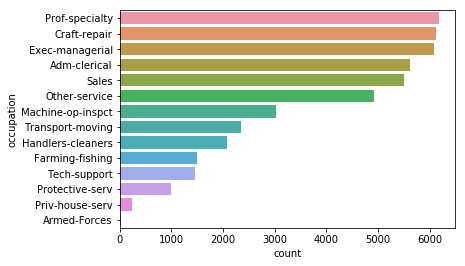

Prof-specialty       0.134078
Craft-repair         0.132774
Exec-managerial      0.132210
Adm-clerical         0.121891
Sales                0.119566
Other-service        0.106945
Machine-op-inspct    0.065649
Transport-moving     0.051159
Handlers-cleaners    0.045011
Farming-fishing      0.032368
Tech-support         0.031412
Protective-serv      0.021354
Priv-house-serv      0.005257
Armed-Forces         0.000326
Name: occupation, dtype: float64


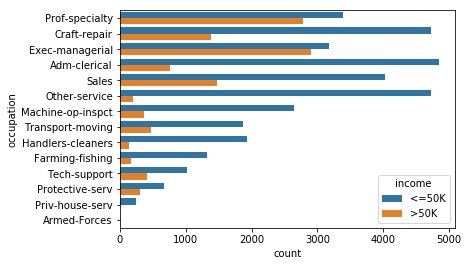

In [49]:
sns.countplot(y = df['occupation'], order = df['occupation'].value_counts().index)
plt.show()
sns.countplot(y = df['occupation'], hue = df['income'], order = df['occupation'].value_counts('%').index)
print(df['occupation'].value_counts('%'))

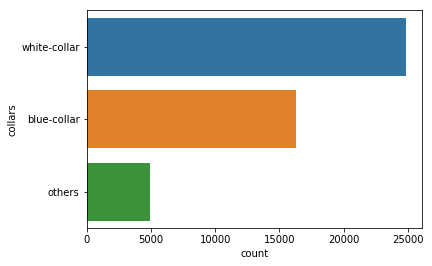

white-collar    0.539157
blue-collar     0.353572
others          0.107271
Name: collars, dtype: float64


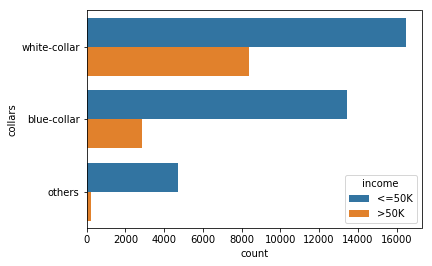

In [50]:
sns.countplot(y = df['collars'], order = df['collars'].value_counts().index)
plt.show()
sns.countplot(y = df['collars'], hue = df['income'], order = df['collars'].value_counts('%').index)
print(df['collars'].value_counts('%'))

Se aprecia una diferencia importante entre White Collars, Blue Collars y Otros. Son pocos Others que tienen un ingreso sobre 50K, en el caso de Blue Collar es proporcionalmente más que Others pero menos que White Collar, dondo los trabajos definidos como White Collar es donde hay una mayor probabilidad de tener ingresos sobre 50K.

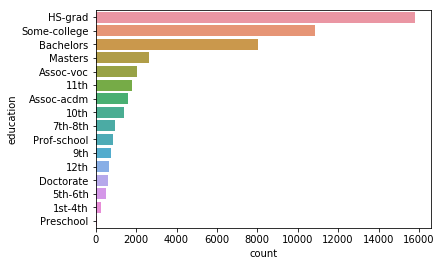

HS-grad         0.323164
Some-college    0.222718
Bachelors       0.164305
Masters         0.054400
Assoc-voc       0.042197
11th            0.037099
Assoc-acdm      0.032779
10th            0.028439
7th-8th         0.019553
Prof-school     0.017075
9th             0.015478
12th            0.013452
Doctorate       0.012162
5th-6th         0.010421
1st-4th         0.005057
Preschool       0.001699
Name: education, dtype: float64


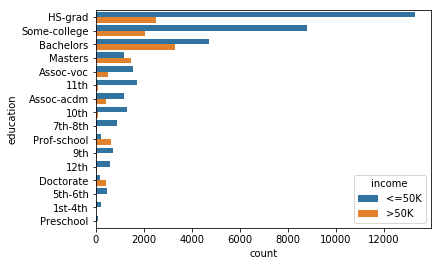

In [51]:
sns.countplot(y = df['education'], order = df['education'].value_counts().index)
plt.show()
sns.countplot(y = df['education'], hue = df['income'], order = df['education'].value_counts('%').index)
print(df['education'].value_counts('%'))

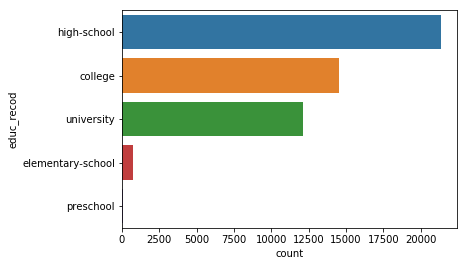

high-school          0.437185
college              0.297695
university           0.247942
elementary-school    0.015478
preschool            0.001699
Name: educ_recod, dtype: float64


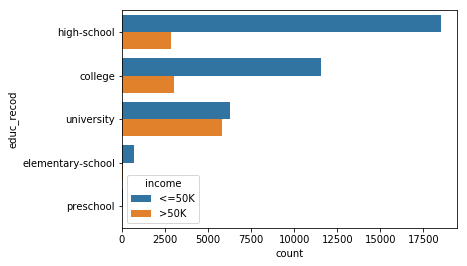

In [52]:
sns.countplot(y = df['educ_recod'], order = df['educ_recod'].value_counts().index)
plt.show()
sns.countplot(y = df['educ_recod'], hue = df['income'], order = df['educ_recod'].value_counts('%').index)
print(df['educ_recod'].value_counts('%'))

Se ve una diferencia importante por el nivel de educación. Quienes fueron a la universidad poco menos 50% gana sobre 50K
En College es cerca del 25% quienes ganan sobre 50K.
High School ya baja el porcentaje aún más, y en el caso de Elemntary School no se aprecia visualmente casos que ganen más de 50K.
Preschool es tn baja la muestra que sería algo que descartaría de la evaluación y posteriomente en la modelación Descriptiva.

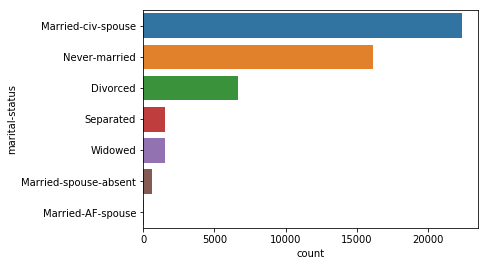

Married-civ-spouse       0.458192
Never-married            0.329982
Divorced                 0.135805
Separated                0.031325
Widowed                  0.031080
Married-spouse-absent    0.012858
Married-AF-spouse        0.000758
Name: marital-status, dtype: float64


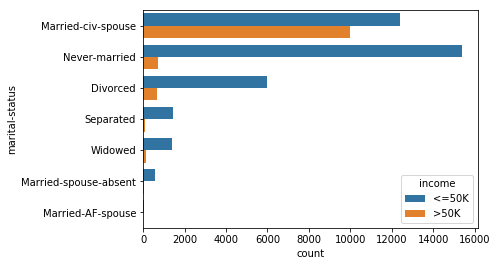

In [53]:
sns.countplot(y = df['marital-status'], order = df['marital-status'].value_counts().index)
plt.show()
sns.countplot(y = df['marital-status'], hue = df['income'], order = df['marital-status'].value_counts('%').index)
print(df['marital-status'].value_counts('%'))

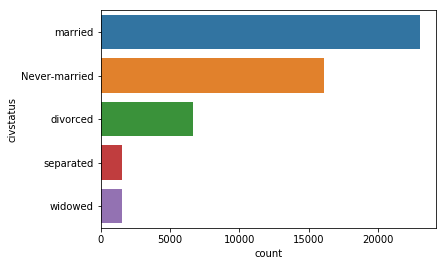

married          0.471807
Never-married    0.329982
divorced         0.135805
separated        0.031325
widowed          0.031080
Name: civstatus, dtype: float64


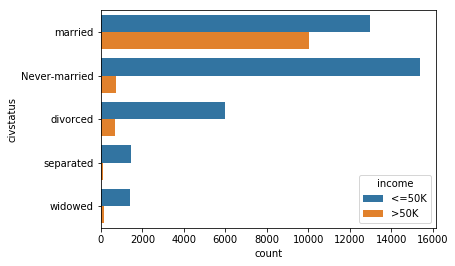

In [54]:
sns.countplot(y = df['civstatus'], order = df['civstatus'].value_counts().index)
plt.show()
sns.countplot(y = df['civstatus'], hue = df['income'], order = df['civstatus'].value_counts('%').index)
print(df['civstatus'].value_counts('%'))

Acá se aprecia una importante diferencia entre quienes están casados y el resto. Quienes están casados se ve un alto porcentaje que tienen ingresos sobre 50K. El resto es bajo en comparación, donde también hay diferencias entre ellos, pero todos se ve más bajo del 24% que es el promedio global.

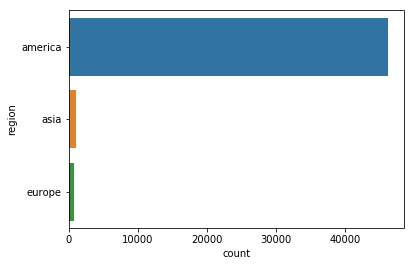

america    0.960904
asia       0.022840
europe     0.016255
Name: region, dtype: float64


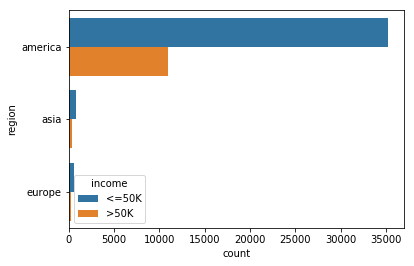

In [55]:
sns.countplot(y = df['region'], order = df['region'].value_counts().index)
plt.show()
sns.countplot(y = df['region'], hue = df['income'], order = df['region'].value_counts('%').index)
print(df['region'].value_counts('%'))

Acá la muestar se concentra en América, con más del 96% de los registros. En este caso recodificaría para dejar Europa y Asia juntos.

In [56]:
df['region_bin_europe_asia'] = 0
df['region_bin_europe_asia'] = df['region_bin_europe'] + df['region_bin_asia']

df_dropna['region_bin_europe_asia'] = 0
df_dropna['region_bin_europe_asia'] = df_dropna['region_bin_europe'] + df_dropna['region_bin_asia']


In [57]:
df['region_bin_europe_asia'].value_counts()

0    46966
1     1876
Name: region_bin_europe_asia, dtype: int64

In [58]:
df_dropna['region_bin_europe_asia'].value_counts()

0    43453
1     1769
Name: region_bin_europe_asia, dtype: int64

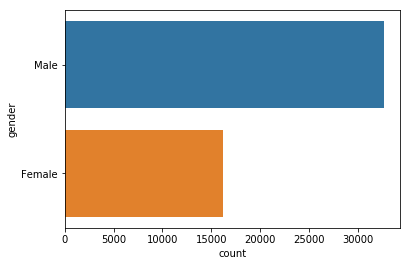

Male      0.668482
Female    0.331518
Name: gender, dtype: float64


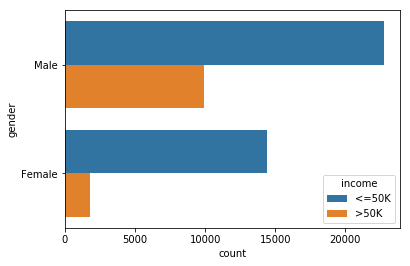

In [59]:
sns.countplot(y = df['gender'], order = df['gender'].value_counts().index)
plt.show()
sns.countplot(y = df['gender'], hue = df['income'], order = df['gender'].value_counts('%').index)
print(df['gender'].value_counts('%'))

Se aprecia una diferencia donde los hombres en un porcentaje bastante más alto gana sobre 50K.

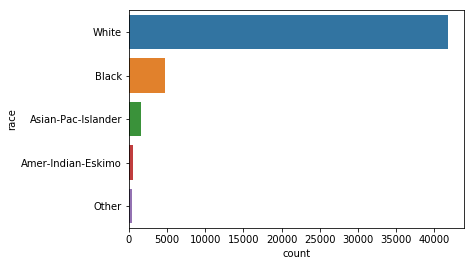

White                 0.855043
Black                 0.095922
Asian-Pac-Islander    0.031100
Amer-Indian-Eskimo    0.009623
Other                 0.008313
Name: race, dtype: float64


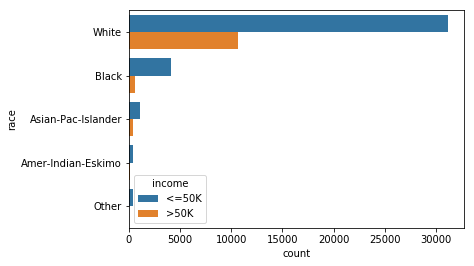

In [60]:
sns.countplot(y = df['race'], order = df['race'].value_counts().index)
plt.show()
sns.countplot(y = df['race'], hue = df['income'], order = df['race'].value_counts('%').index)
print(df['race'].value_counts('%'))

Raz blanca y Asian-Pac-islander se ve una diferencia con el resto, ya que en mayor porcentaje ganan sobre 50K.

In [61]:
df[df['race']=='Black']['income'].value_counts('%')

<=50K    0.879189
>50K     0.120811
Name: income, dtype: float64

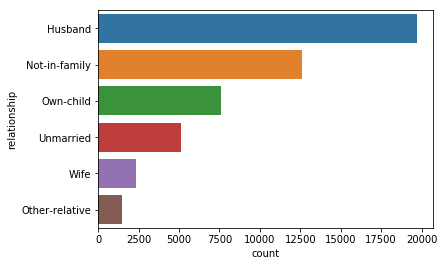

Husband           0.403669
Not-in-family     0.257627
Own-child         0.155215
Unmarried         0.104930
Wife              0.047725
Other-relative    0.030834
Name: relationship, dtype: float64


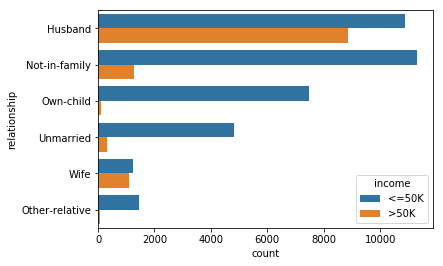

In [62]:
sns.countplot(y = df['relationship'], order = df['relationship'].value_counts().index)
plt.show()
sns.countplot(y = df['relationship'], hue = df['income'], order = df['relationship'].value_counts('%').index)
print(df['relationship'].value_counts('%'))

Se aprecian diferencia importantes, donde Husband y Wife son quienes tiene mayor porcentaje de casos de ingresos sobre 50K. Que tiene sentido ya que previamente vimos que los qe estaban casados tienen en forma importante más casos donde ganan sobre 50K.
Aunque vimos que en Gender había una diferencia entre hombre y mujer que acá en tre Husband y Wife no se aprecia, y de hecho porcentualmente Wife es mayor el porcentaje sobre 50K que Husband. 

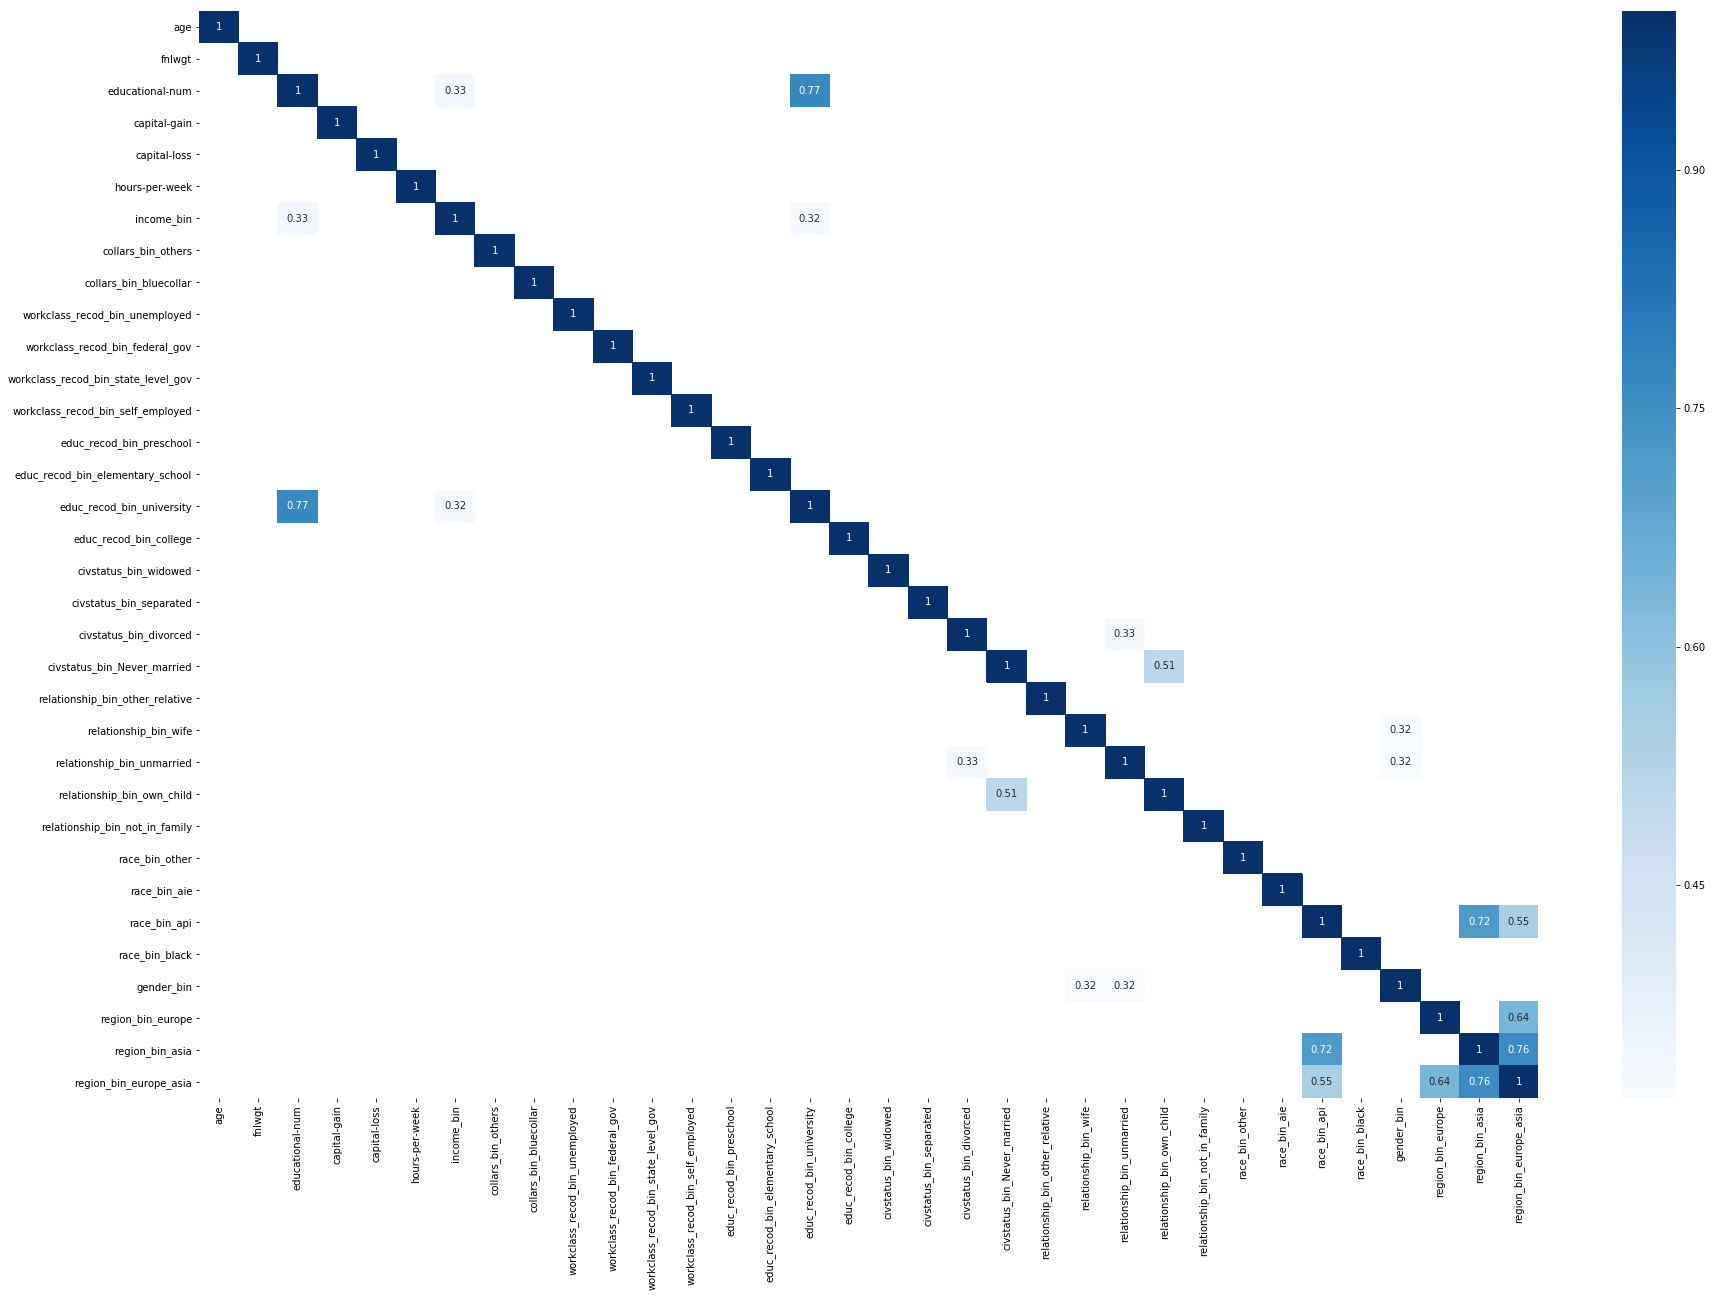

In [63]:
plt.figure(figsize=(30,20))
M=df.corr()
sns.heatmap(M[M>.3], cmap='Blues', annot=True)

Los que tienen mayor correlación, Educacational-num y edu_recod_bin_university, están relacionados ya que edu_recod_bin_university se binariza de Educational que es lo mismo que Educational-num.

Race_bin_api y Region_bin_asia tb tienen una alta correlación y tiene sentido ya que de la región de asía son de raza asiática.

civstatus_bin_never_married y Relationship_bin_not_in_family tb tiene una correlación importante y tiene sentido ya que los no casados calzarían en la categoría de not in a family.

Además tiene sentido que region_bin_europe_asia tengo alta correlación con region_bin_europe, region_bin_asia y Race_bin_api, ya que este es la suma de region_bin_europe y region_bin_asia, y region_bin_asia con Race_bin_api están correlacionados entre sí.

In [64]:
stats.ttest_ind(df['race_bin_api'], df['region_bin_asia'])

Ttest_indResult(statistic=8.387811718159856, pvalue=5.017652076470017e-17)

In [65]:
stats.ttest_ind(df['civstatus_bin_Never_married'], df['relationship_bin_not_in_family'])

Ttest_indResult(statistic=24.901919245249825, pvalue=1.8957132233571654e-136)

Revisando una prueba de hipótesis entre ambos para ver si estadísticamente se pueden considerar iguales, vemos que en ambos casos se rechaza la hipótesis nula entonces podemos con un 95% de certeza decir que estas variables no son iguales, por lo tanto trabajaremos con todas ellas para la modelación descriptiva.

In [66]:
df.isnull().sum()

age                                       0
workclass                              2799
fnlwgt                                    0
education                                 0
educational-num                           0
marital-status                            0
occupation                             2809
relationship                              0
race                                      0
gender                                    0
capital-gain                              0
capital-loss                              0
hours-per-week                            0
native-country                          857
income                                    0
collars                                2809
workclass_recod                        2799
educ_recod                                0
civstatus                                 0
region                                  857
income_bin                                0
collars_bin_others                        0
collars_bin_bluecollar          

In [67]:
columnas = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income', 'collars', 'workclass_recod', 'region']
for i in columnas:
    df[i] = df[i].replace([None], [999])

In [68]:
df.isnull().sum()

age                                    0
workclass                              0
fnlwgt                                 0
education                              0
educational-num                        0
marital-status                         0
occupation                             0
relationship                           0
race                                   0
gender                                 0
capital-gain                           0
capital-loss                           0
hours-per-week                         0
native-country                         0
income                                 0
collars                                0
workclass_recod                        0
educ_recod                             0
civstatus                              0
region                                 0
income_bin                             0
collars_bin_others                     0
collars_bin_bluecollar                 0
workclass_recod_bin_unemployed         0
workclass_recod_

De las variables que tienen casos nulos, me interesa ver como están distribuidos en cuanto a los que tienen más de 50K y menor a 50K vs el promedio global. Hago el cambio a 999 para poder hacer el cálculo.

In [69]:
df[df['workclass'] == 999]['income'].value_counts('%')

<=50K    0.905323
>50K     0.094677
Name: income, dtype: float64

In [70]:
df[df['occupation'] == 999]['income'].value_counts('%')

<=50K    0.90566
>50K     0.09434
Name: income, dtype: float64

In [71]:
df[df['region'] == 999]['income'].value_counts('%')

<=50K    0.743291
>50K     0.256709
Name: income, dtype: float64

Vemos que en Region está dentro del promedio global, pero en el caso de occupation y workclass hay una diferencia importante. Entonces si se trabaja sin estos datos puede haber una diferencia o un sesgo, por ende creo interesante ver el comportamiento entre ambos casos, de la base con Dropna, y la base Sin dropna y que los datos perdidos o nulos finalmente se asignan por defecto a la variable con mayor ponderación.

In [72]:
columnas = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income', 'collars', 'workclass_recod', 'region']
for i in columnas:
    df[i] = df[i].replace([999], [None])

In [73]:
df.isnull().sum()

age                                       0
workclass                              2799
fnlwgt                                    0
education                                 0
educational-num                           0
marital-status                            0
occupation                             2809
relationship                              0
race                                      0
gender                                    0
capital-gain                              0
capital-loss                              0
hours-per-week                            0
native-country                          857
income                                    0
collars                                2809
workclass_recod                        2799
educ_recod                                0
civstatus                                 0
region                                  857
income_bin                                0
collars_bin_others                        0
collars_bin_bluecollar          

# Modelación Descriptiva

In [74]:
df['educational_num'] = df['educational-num']
df['capital_gain'] = df['capital-gain']
df['capital_loss'] = df['capital-loss']
df['hours_per_week'] = df['hours-per-week']

df_dropna['educational_num'] = df_dropna['educational-num']
df_dropna['capital_gain'] = df_dropna['capital-gain']
df_dropna['capital_loss'] = df_dropna['capital-loss']
df_dropna['hours_per_week'] = df_dropna['hours-per-week']

In [75]:
#Creo un subset de ambos dataframes, y a continuación procederé a eliminar las columnas que no utilizaremos para el modelo.

df2 = df
df_dropna2 = df_dropna

In [76]:
categorical_colums = ['hours-per-week', 'capital-gain', 'capital-loss', 'educational-num', 'education', 'fnlwgt', 'workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender',
                     'native-country', 'income', 'educ_recod', 'collars', 'workclass_recod', 'civstatus', 
                      'region', 'region_bin_asia', 'region_bin_europe']

for cat in categorical_colums:
    df2 = df2.drop(cat, axis=1)
    df_dropna2 = df_dropna2.drop(cat, axis=1)

In [77]:
df2.shape

(48842, 31)

In [78]:
df_dropna2.shape

(45222, 31)

In [79]:
for i in df2.columns:
    print(i)

age
income_bin
collars_bin_others
collars_bin_bluecollar
workclass_recod_bin_unemployed
workclass_recod_bin_federal_gov
workclass_recod_bin_state_level_gov
workclass_recod_bin_self_employed
educ_recod_bin_preschool
educ_recod_bin_elementary_school
educ_recod_bin_university
educ_recod_bin_college
civstatus_bin_widowed
civstatus_bin_separated
civstatus_bin_divorced
civstatus_bin_Never_married
relationship_bin_other_relative
relationship_bin_wife
relationship_bin_unmarried
relationship_bin_own_child
relationship_bin_not_in_family
race_bin_other
race_bin_aie
race_bin_api
race_bin_black
gender_bin
region_bin_europe_asia
educational_num
capital_gain
capital_loss
hours_per_week


In [80]:
variables = ""
for i in df2.columns:
    if i == 'age':
        variables = i
    else:
        variables = variables + ' + ' + i

variables

'age + income_bin + collars_bin_others + collars_bin_bluecollar + workclass_recod_bin_unemployed + workclass_recod_bin_federal_gov + workclass_recod_bin_state_level_gov + workclass_recod_bin_self_employed + educ_recod_bin_preschool + educ_recod_bin_elementary_school + educ_recod_bin_university + educ_recod_bin_college + civstatus_bin_widowed + civstatus_bin_separated + civstatus_bin_divorced + civstatus_bin_Never_married + relationship_bin_other_relative + relationship_bin_wife + relationship_bin_unmarried + relationship_bin_own_child + relationship_bin_not_in_family + race_bin_other + race_bin_aie + race_bin_api + race_bin_black + gender_bin + region_bin_europe_asia + educational_num + capital_gain + capital_loss + hours_per_week'

### Primero realizo el análisis del modelo descriptivo con la base completa:

In [81]:
#Primero utilizamos todas las variables y descartamos en base al estadístico de prueba > 0.05

m1_logit = smf.logit('income_bin ~ age + collars_bin_others + collars_bin_bluecollar + workclass_recod_bin_unemployed + workclass_recod_bin_federal_gov + workclass_recod_bin_state_level_gov + workclass_recod_bin_self_employed + educ_recod_bin_preschool + educ_recod_bin_elementary_school + educ_recod_bin_university + educ_recod_bin_college + civstatus_bin_widowed + civstatus_bin_separated + civstatus_bin_divorced + civstatus_bin_Never_married + relationship_bin_other_relative + relationship_bin_wife + relationship_bin_unmarried + relationship_bin_own_child + relationship_bin_not_in_family + race_bin_other + race_bin_aie + race_bin_api + race_bin_black + gender_bin + region_bin_europe_asia + capital_gain + capital_loss + hours_per_week', df2).fit()
m1_logit.summary()

Optimization terminated successfully.
         Current function value: 0.330051
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             income_bin   No. Observations:                48842
Model:                          Logit   Df Residuals:                    48812
Method:                           MLE   Df Model:                           29
Date:                Thu, 14 Nov 2019   Pseudo R-squ.:                  0.4002
Time:                        23:50:20   Log-Likelihood:                -16120.
converged:                       True   LL-Null:                       -26875.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -3.0669      0.091    -33.531      0.000      -3.246      -2.888
age                                     0.0202      0.001     16.070      0.000       0.018       0.023
collars_bin_others                     -1.3015      0.083    -15.608      0.000      -1.465      -1.138
collars_bin_bluecollar                 -0.5695      0.034    -16.730      0.000      -0.636      -0.503
workclass_recod_bin_unemployed         -0.9055      0.777     -1.165      0.244      -2.429       0.618
workclass_recod_bin_federal_gov         0.5717      0.074      7.758      0.000       0.427       0.716
workclass_recod_bin_state_level_gov     0.0441      0.045      0.985      0.325      -0.044       0.132
workclass_recod_bin_self_employed      -0.2462      0.041     -6.021      0.000      -0.326      -0.166
educ_recod_bin_preschool               -5.9027      3.838     -1.538      0.124     -13.426       1.621
educ_recod_bin_elementary_school       -1.3137      0.189     -6.959      0.000      -1.684      -0.944
educ_recod_bin_university               1.5414      0.038     40.159      0.000       1.466       1.617
educ_recod_bin_college                  0.6303      0.036     17.722      0.000       0.561       0.700
civstatus_bin_widowed                  -0.6940      0.167     -4.148      0.000      -1.022      -0.366
civstatus_bin_separated                -0.8140      0.173     -4.718      0.000      -1.152      -0.476
civstatus_bin_divorced                 -0.7119      0.132     -5.403      0.000      -0.970      -0.454
civstatus_bin_Never_married            -1.2485      0.130     -9.613      0.000      -1.503      -0.994
relationship_bin_other_relative        -1.5746      0.182     -8.639      0.000      -1.932      -1.217
relationship_bin_wife                   1.0168      0.081     12.565      0.000       0.858       1.175
relationship_bin_unmarried             -1.2310      0.144     -8.553      0.000      -1.513      -0.949
relationship_bin_own_child             -2.0816      0.160    -13.037      0.000      -2.395      -1.769
relationship_bin_not_in_family         -0.9904      0.127     -7.802      0.000      -1.239      -0.742
race_bin_other                         -0.4029      0.193     -2.093      0.036      -0.780      -0.026
race_bin_aie                           -0.6257      0.176     -3.556      0.000      -0.971      -0.281
race_bin_api                           -0.1096      0.097     -1.128      0.259      -0.300       0.081
race_bin_black                         -0.2616      0.060     -4.362      0.000      -0.379      -0.144
gender_bin                             -0.7496      0.062    -12.024      0.000      -0.872      -0.627
region_bin_europe_asia                  0.0351      0.084      0.417      0.677      -0.130       0.200
capital_gain                            0.0003   8.26e-06     38.497      0.000       0.000       0.000
capital_loss     

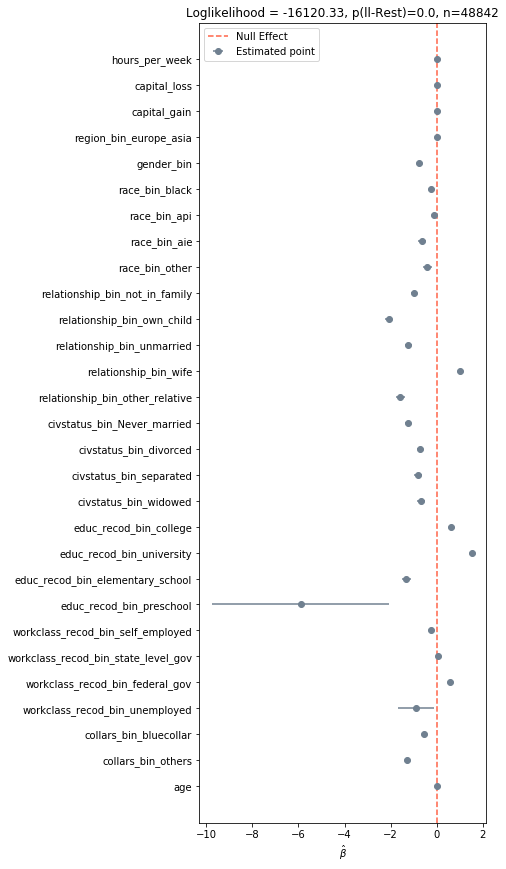

In [82]:
hp.coefplot(m1_logit)

In [83]:
m1_logit = smf.logit('income_bin ~ age + collars_bin_others + collars_bin_bluecollar + workclass_recod_bin_federal_gov + workclass_recod_bin_self_employed + educ_recod_bin_elementary_school + educ_recod_bin_university + educ_recod_bin_college + civstatus_bin_widowed + civstatus_bin_separated + civstatus_bin_divorced + civstatus_bin_Never_married + relationship_bin_other_relative + relationship_bin_wife + relationship_bin_unmarried + relationship_bin_own_child + relationship_bin_not_in_family + race_bin_other + race_bin_aie + race_bin_black + gender_bin + capital_gain + capital_loss + hours_per_week', df2).fit()
m1_logit.summary()

Optimization terminated successfully.
         Current function value: 0.330282
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             income_bin   No. Observations:                48842
Model:                          Logit   Df Residuals:                    48817
Method:                           MLE   Df Model:                           24
Date:                Thu, 14 Nov 2019   Pseudo R-squ.:                  0.3998
Time:                        23:50:21   Log-Likelihood:                -16132.
converged:                       True   LL-Null:                       -26875.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -3.0692      0.091    -33.598      0.000      -3.248      -2.890
age                                   0.0202      0.001     16.090      0.000       0.018       0.023
collars_bin_others                   -1.3065      0.083    -15.690      0.000      -1.470      -1.143
collars_bin_bluecollar               -0.5689      0.034    -16.733      0.000      -0.636      -0.502
workclass_recod_bin_federal_gov       0.5652      0.073      7.704      0.000       0.421       0.709
workclass_recod_bin_self_employed    -0.2507      0.040     -6.214      0.000      -0.330      -0.172
educ_recod_bin_elementary_school     -1.3115      0.189     -6.950      0.000      -1.681      -0.942
educ_recod_bin_university             1.5487      0.038     40.977      0.000       1.475       1.623
educ_recod_bin_college                0.6353      0.036     17.892      0.000       0.566       0.705
civstatus_bin_widowed                -0.6798      0.167     -4.071      0.000      -1.007      -0.352
civstatus_bin_separated              -0.8103      0.172     -4.698      0.000      -1.148      -0.472
civstatus_bin_divorced               -0.6948      0.131     -5.290      0.000      -0.952      -0.437
civstatus_bin_Never_married          -1.2349      0.130     -9.535      0.000      -1.489      -0.981
relationship_bin_other_relative      -1.5990      0.182     -8.806      0.000      -1.955      -1.243
relationship_bin_wife                 1.0094      0.081     12.486      0.000       0.851       1.168
relationship_bin_unmarried           -1.2456      0.144     -8.678      0.000      -1.527      -0.964
relationship_bin_own_child           -2.1006      0.159    -13.188      0.000      -2.413      -1.788
relationship_bin_not_in_family       -1.0067      0.127     -7.952      0.000      -1.255      -0.759
race_bin_other                       -0.4044      0.192     -2.108      0.035      -0.780      -0.028
race_bin_aie                         -0.6167      0.176     -3.508      0.000      -0.961      -0.272
race_bin_black                       -0.2592      0.060     -4.334      0.000      -0.376      -0.142
gender_bin                           -0.7441      0.062    -11.953      0.000      -0.866      -0.622
capital_gain                          0.0003   8.24e-06     38.501      0.000       0.000       0.000
capital_loss                          0.0007   2.94e-05     22.510      0.000       0.001       0.001
hours_per_week                        0.0317      0.001     25.814      0.000       0.029       0.034
=====================================================================================================
"""

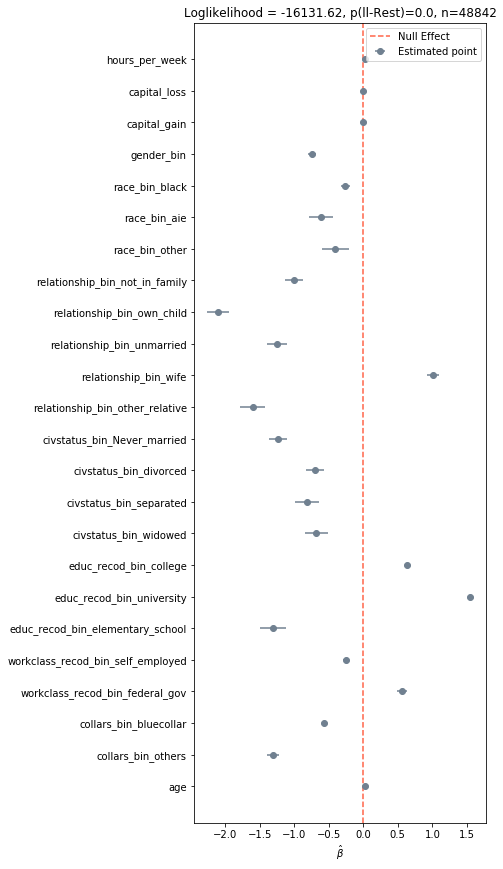

In [84]:
hp.coefplot(m1_logit)

Eliminaré las variables que están sobre las línea roja punteada, ya que son de bajo coeficiente por lo tanto no debieran el impacto que tienen es marginal. Estas son Age, Hours Per Week, Capital Loss y Capital Gain

In [85]:
m1_logit2 = smf.logit('income_bin ~ collars_bin_others + collars_bin_bluecollar + workclass_recod_bin_federal_gov + workclass_recod_bin_self_employed + educ_recod_bin_elementary_school + educ_recod_bin_university + educ_recod_bin_college + civstatus_bin_widowed + civstatus_bin_separated + civstatus_bin_divorced + civstatus_bin_Never_married + relationship_bin_other_relative + relationship_bin_wife + relationship_bin_unmarried + relationship_bin_own_child + relationship_bin_not_in_family + race_bin_other + race_bin_aie + race_bin_black + gender_bin', df2).fit()
m1_logit2.summary()

Optimization terminated successfully.
         Current function value: 0.375069
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             income_bin   No. Observations:                48842
Model:                          Logit   Df Residuals:                    48821
Method:                           MLE   Df Model:                           20
Date:                Thu, 14 Nov 2019   Pseudo R-squ.:                  0.3184
Time:                        23:50:23   Log-Likelihood:                -18319.
converged:                       True   LL-Null:                       -26875.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.5490      0.031    -17.593      0.000      -0.610      -0.488
collars_bin_others                   -1.4474      0.078    -18.466      0.000      -1.601      -1.294
collars_bin_bluecollar               -0.6205      0.032    -19.598      0.000      -0.683      -0.558
workclass_recod_bin_federal_gov       0.5820      0.069      8.376      0.000       0.446       0.718
workclass_recod_bin_self_employed     0.0705      0.036      1.944      0.052      -0.001       0.142
educ_recod_bin_elementary_school     -1.2369      0.179     -6.925      0.000      -1.587      -0.887
educ_recod_bin_university             1.6319      0.035     46.511      0.000       1.563       1.701
educ_recod_bin_college                0.5946      0.033     18.053      0.000       0.530       0.659
civstatus_bin_widowed                -0.3543      0.149     -2.373      0.018      -0.647      -0.062
civstatus_bin_separated              -0.7168      0.157     -4.566      0.000      -1.024      -0.409
civstatus_bin_divorced               -0.5161      0.120     -4.292      0.000      -0.752      -0.280
civstatus_bin_Never_married          -1.3476      0.118    -11.379      0.000      -1.580      -1.116
relationship_bin_other_relative      -1.7489      0.166    -10.532      0.000      -2.074      -1.423
relationship_bin_wife                 0.8205      0.074     11.109      0.000       0.676       0.965
relationship_bin_unmarried           -1.3176      0.131    -10.022      0.000      -1.575      -1.060
relationship_bin_own_child           -2.4379      0.147    -16.554      0.000      -2.727      -2.149
relationship_bin_not_in_family       -0.9793      0.116     -8.416      0.000      -1.207      -0.751
race_bin_other                       -0.5119      0.178     -2.871      0.004      -0.861      -0.162
race_bin_aie                         -0.5823      0.163     -3.570      0.000      -0.902      -0.263
race_bin_black                       -0.2389      0.055     -4.306      0.000      -0.348      -0.130
gender_bin                           -0.8504      0.056    -15.163      0.000      -0.960      -0.740
=====================================================================================================
"""

Eliminamos workclass_recod_bin_self_employed y vemos que el R bajó significativamente al eliminar las 4 variables. Habría que revisar en el modelo de predicción y medidas de desempeño como se comportan finalmente para ver que modelo es mejor.

In [86]:
m1_logit2 = smf.logit('income_bin ~ collars_bin_others + collars_bin_bluecollar + workclass_recod_bin_federal_gov + educ_recod_bin_elementary_school + educ_recod_bin_university + educ_recod_bin_college + civstatus_bin_widowed + civstatus_bin_separated + civstatus_bin_divorced + civstatus_bin_Never_married + relationship_bin_other_relative + relationship_bin_wife + relationship_bin_unmarried + relationship_bin_own_child + relationship_bin_not_in_family + race_bin_other + race_bin_aie + race_bin_black + gender_bin', df2).fit()
m1_logit2.summary()

Optimization terminated successfully.
         Current function value: 0.375107
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             income_bin   No. Observations:                48842
Model:                          Logit   Df Residuals:                    48822
Method:                           MLE   Df Model:                           19
Date:                Thu, 14 Nov 2019   Pseudo R-squ.:                  0.3183
Time:                        23:50:23   Log-Likelihood:                -18321.
converged:                       True   LL-Null:                       -26875.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -0.5350      0.030    -17.625      0.000      -0.594      -0.475
collars_bin_others                  -1.4503      0.078    -18.503      0.000      -1.604      -1.297
collars_bin_bluecollar              -0.6220      0.032    -19.649      0.000      -0.684      -0.560
workclass_recod_bin_federal_gov      0.5713      0.069      8.242      0.000       0.435       0.707
educ_recod_bin_elementary_school    -1.2393      0.179     -6.940      0.000      -1.589      -0.889
educ_recod_bin_university            1.6331      0.035     46.551      0.000       1.564       1.702
educ_recod_bin_college               0.5942      0.033     18.041      0.000       0.530       0.659
civstatus_bin_widowed               -0.3509      0.149     -2.351      0.019      -0.643      -0.058
civstatus_bin_separated             -0.7165      0.157     -4.564      0.000      -1.024      -0.409
civstatus_bin_divorced              -0.5157      0.120     -4.289      0.000      -0.751      -0.280
civstatus_bin_Never_married         -1.3520      0.118    -11.418      0.000      -1.584      -1.120
relationship_bin_other_relative     -1.7524      0.166    -10.554      0.000      -2.078      -1.427
relationship_bin_wife                0.8211      0.074     11.116      0.000       0.676       0.966
relationship_bin_unmarried          -1.3201      0.131    -10.043      0.000      -1.578      -1.062
relationship_bin_own_child          -2.4413      0.147    -16.577      0.000      -2.730      -2.153
relationship_bin_not_in_family      -0.9812      0.116     -8.431      0.000      -1.209      -0.753
race_bin_other                      -0.5149      0.178     -2.890      0.004      -0.864      -0.166
race_bin_aie                        -0.5840      0.163     -3.581      0.000      -0.904      -0.264
race_bin_black                      -0.2445      0.055     -4.414      0.000      -0.353      -0.136
gender_bin                          -0.8564      0.056    -15.292      0.000      -0.966      -0.747
====================================================================================================
"""

Ahora realizaré el mismo análisis con la base con Dropna.

In [87]:
m1_logit_dropna = smf.logit('income_bin ~ age + collars_bin_others + collars_bin_bluecollar + workclass_recod_bin_unemployed + workclass_recod_bin_federal_gov + workclass_recod_bin_state_level_gov + workclass_recod_bin_self_employed + educ_recod_bin_preschool + educ_recod_bin_elementary_school + educ_recod_bin_university + educ_recod_bin_college + civstatus_bin_widowed + civstatus_bin_separated + civstatus_bin_divorced + civstatus_bin_Never_married + relationship_bin_other_relative + relationship_bin_wife + relationship_bin_unmarried + relationship_bin_own_child + relationship_bin_not_in_family + race_bin_other + race_bin_aie + race_bin_api + race_bin_black + gender_bin + region_bin_europe_asia + capital_gain + capital_loss + hours_per_week', df_dropna2).fit()
m1_logit_dropna.summary()

Optimization terminated successfully.
         Current function value: 0.335755
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             income_bin   No. Observations:                45222
Model:                          Logit   Df Residuals:                    45192
Method:                           MLE   Df Model:                           29
Date:                Thu, 14 Nov 2019   Pseudo R-squ.:                  0.4004
Time:                        23:50:24   Log-Likelihood:                -15184.
converged:                       True   LL-Null:                       -25322.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -2.9901      0.095    -31.375      0.000      -3.177      -2.803
age                                     0.0236      0.001     17.686      0.000       0.021       0.026
collars_bin_others                     -1.4109      0.085    -16.551      0.000      -1.578      -1.244
collars_bin_bluecollar                 -0.6694      0.035    -19.081      0.000      -0.738      -0.601
workclass_recod_bin_unemployed         -0.9434      0.787     -1.198      0.231      -2.486       0.600
workclass_recod_bin_federal_gov         0.4742      0.075      6.339      0.000       0.328       0.621
workclass_recod_bin_state_level_gov    -0.0247      0.045     -0.544      0.587      -0.114       0.064
workclass_recod_bin_self_employed      -0.3257      0.042     -7.799      0.000      -0.408      -0.244
educ_recod_bin_preschool               -5.9447      4.079     -1.457      0.145     -13.939       2.050
educ_recod_bin_elementary_school       -1.3164      0.203     -6.490      0.000      -1.714      -0.919
educ_recod_bin_university               1.4927      0.040     37.362      0.000       1.414       1.571
educ_recod_bin_college                  0.5911      0.037     16.140      0.000       0.519       0.663
civstatus_bin_widowed                  -0.6926      0.174     -3.969      0.000      -1.035      -0.351
civstatus_bin_separated                -0.8168      0.177     -4.604      0.000      -1.164      -0.469
civstatus_bin_divorced                 -0.7773      0.137     -5.659      0.000      -1.047      -0.508
civstatus_bin_Never_married            -1.2832      0.136     -9.458      0.000      -1.549      -1.017
relationship_bin_other_relative        -1.4657      0.186     -7.883      0.000      -1.830      -1.101
relationship_bin_wife                   1.0516      0.084     12.561      0.000       0.887       1.216
relationship_bin_unmarried             -1.1976      0.149     -8.019      0.000      -1.490      -0.905
relationship_bin_own_child             -1.9897      0.166    -12.014      0.000      -2.314      -1.665
relationship_bin_not_in_family         -0.9559      0.133     -7.196      0.000      -1.216      -0.696
race_bin_other                         -0.3656      0.203     -1.799      0.072      -0.764       0.033
race_bin_aie                           -0.6089      0.180     -3.374      0.001      -0.963      -0.255
race_bin_api                           -0.0310      0.106     -0.293      0.769      -0.238       0.176
race_bin_black                         -0.2334      0.062     -3.755      0.000      -0.355      -0.112
gender_bin                             -0.7837      0.064    -12.277      0.000      -0.909      -0.659
region_bin_europe_asia                 -0.0126      0.088     -0.144      0.886      -0.185       0.159
capital_gain                            0.0003   8.56e-06     37.271      0.000       0.000       0.000
capital_loss     

Se comporta muy parecido a la base completa. La diferencia es que acá la variable race_bin_other la descartaríamos en cambio en el modelo completo no alcanzó a rechazar.

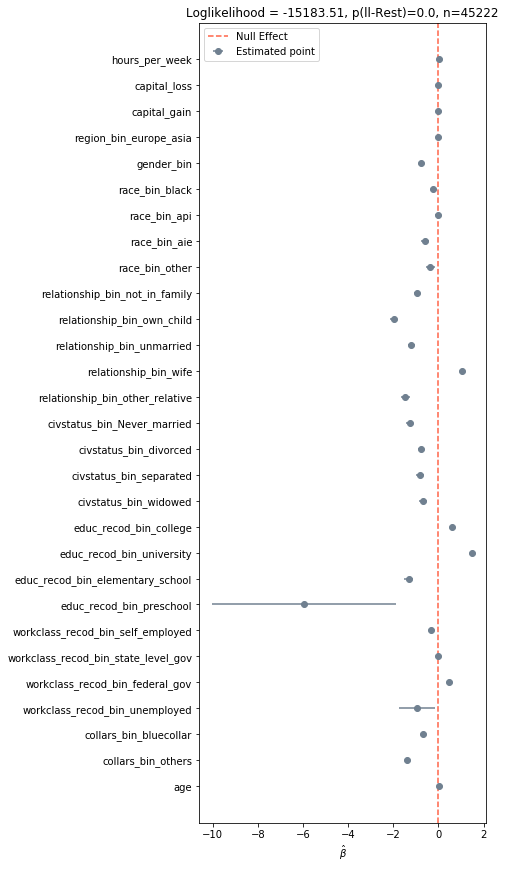

In [88]:
hp.coefplot(m1_logit_dropna)

In [89]:
m1_logit_dropna = smf.logit('income_bin ~ age + collars_bin_others + collars_bin_bluecollar + workclass_recod_bin_federal_gov + workclass_recod_bin_self_employed + educ_recod_bin_elementary_school + educ_recod_bin_university + educ_recod_bin_college + civstatus_bin_widowed + civstatus_bin_separated + civstatus_bin_divorced + civstatus_bin_Never_married + relationship_bin_other_relative + relationship_bin_wife + relationship_bin_unmarried + relationship_bin_own_child + relationship_bin_not_in_family + race_bin_aie + race_bin_black + gender_bin + capital_gain + capital_loss + hours_per_week', df_dropna2).fit()
m1_logit_dropna.summary()

Optimization terminated successfully.
         Current function value: 0.335994
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             income_bin   No. Observations:                45222
Model:                          Logit   Df Residuals:                    45198
Method:                           MLE   Df Model:                           23
Date:                Thu, 14 Nov 2019   Pseudo R-squ.:                  0.4000
Time:                        23:50:26   Log-Likelihood:                -15194.
converged:                       True   LL-Null:                       -25322.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -2.9979      0.095    -31.513      0.000      -3.184      -2.811
age                                   0.0235      0.001     17.698      0.000       0.021       0.026
collars_bin_others                   -1.4185      0.085    -16.669      0.000      -1.585      -1.252
collars_bin_bluecollar               -0.6724      0.035    -19.179      0.000      -0.741      -0.604
workclass_recod_bin_federal_gov       0.4791      0.074      6.441      0.000       0.333       0.625
workclass_recod_bin_self_employed    -0.3199      0.041     -7.777      0.000      -0.401      -0.239
educ_recod_bin_elementary_school     -1.3240      0.203     -6.535      0.000      -1.721      -0.927
educ_recod_bin_university             1.4912      0.039     37.879      0.000       1.414       1.568
educ_recod_bin_college                0.5933      0.037     16.226      0.000       0.522       0.665
civstatus_bin_widowed                -0.6750      0.174     -3.875      0.000      -1.016      -0.334
civstatus_bin_separated              -0.8116      0.177     -4.576      0.000      -1.159      -0.464
civstatus_bin_divorced               -0.7591      0.137     -5.543      0.000      -1.027      -0.491
civstatus_bin_Never_married          -1.2668      0.135     -9.364      0.000      -1.532      -1.002
relationship_bin_other_relative      -1.4869      0.186     -8.015      0.000      -1.850      -1.123
relationship_bin_wife                 1.0474      0.084     12.519      0.000       0.883       1.211
relationship_bin_unmarried           -1.2157      0.149     -8.162      0.000      -1.508      -0.924
relationship_bin_own_child           -2.0064      0.165    -12.149      0.000      -2.330      -1.683
relationship_bin_not_in_family       -0.9732      0.132     -7.347      0.000      -1.233      -0.714
race_bin_aie                         -0.6065      0.180     -3.363      0.001      -0.960      -0.253
race_bin_black                       -0.2329      0.062     -3.756      0.000      -0.354      -0.111
gender_bin                           -0.7834      0.064    -12.288      0.000      -0.908      -0.658
capital_gain                          0.0003   8.53e-06     37.280      0.000       0.000       0.000
capital_loss                          0.0007   3.04e-05     21.758      0.000       0.001       0.001
hours_per_week                        0.0298      0.001     22.856      0.000       0.027       0.032
=====================================================================================================
"""

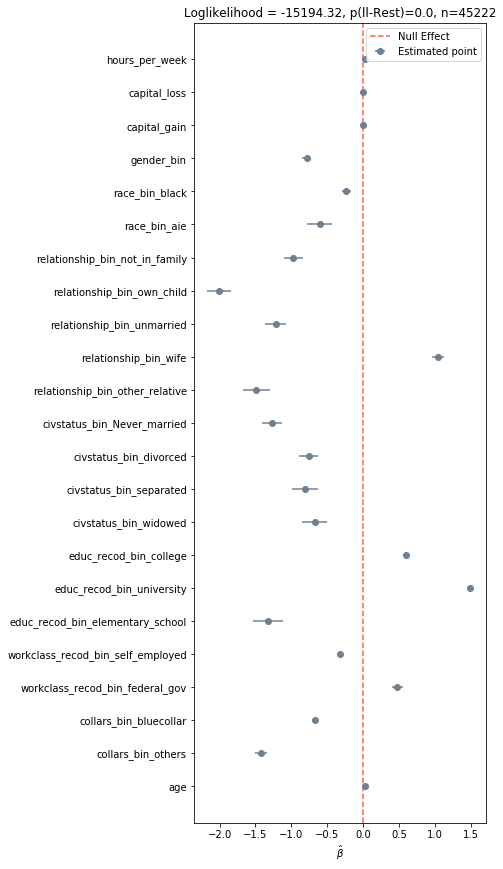

In [90]:
hp.coefplot(m1_logit_dropna)

AL igual que en el modelo completo eliminamos las variables sobre la línea roja, ya que son de coefiente marginal.

In [91]:
m1_logit_dropna2 = smf.logit('income_bin ~ collars_bin_others + collars_bin_bluecollar + workclass_recod_bin_federal_gov + workclass_recod_bin_self_employed + educ_recod_bin_elementary_school + educ_recod_bin_university + educ_recod_bin_college + civstatus_bin_widowed + civstatus_bin_separated + civstatus_bin_divorced + civstatus_bin_Never_married + relationship_bin_other_relative + relationship_bin_wife + relationship_bin_unmarried + relationship_bin_own_child + relationship_bin_not_in_family + race_bin_aie + race_bin_black + gender_bin', df_dropna2).fit()
m1_logit_dropna2.summary()

Optimization terminated successfully.
         Current function value: 0.381055
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             income_bin   No. Observations:                45222
Model:                          Logit   Df Residuals:                    45202
Method:                           MLE   Df Model:                           19
Date:                Thu, 14 Nov 2019   Pseudo R-squ.:                  0.3195
Time:                        23:50:27   Log-Likelihood:                -17232.
converged:                       True   LL-Null:                       -25322.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.4102      0.033    -12.411      0.000      -0.475      -0.345
collars_bin_others                   -1.5608      0.080    -19.477      0.000      -1.718      -1.404
collars_bin_bluecollar               -0.7314      0.033    -22.328      0.000      -0.796      -0.667
workclass_recod_bin_federal_gov       0.5036      0.070      7.153      0.000       0.366       0.642
workclass_recod_bin_self_employed     0.0064      0.037      0.174      0.862      -0.066       0.079
educ_recod_bin_elementary_school     -1.2389      0.193     -6.435      0.000      -1.616      -0.862
educ_recod_bin_university             1.5700      0.037     42.858      0.000       1.498       1.642
educ_recod_bin_college                0.5492      0.034     16.162      0.000       0.483       0.616
civstatus_bin_widowed                -0.2843      0.156     -1.821      0.069      -0.590       0.022
civstatus_bin_separated              -0.7288      0.161     -4.517      0.000      -1.045      -0.413
civstatus_bin_divorced               -0.5797      0.125     -4.621      0.000      -0.826      -0.334
civstatus_bin_Never_married          -1.4202      0.124    -11.472      0.000      -1.663      -1.178
relationship_bin_other_relative      -1.6655      0.171     -9.766      0.000      -2.000      -1.331
relationship_bin_wife                 0.8586      0.077     11.205      0.000       0.708       1.009
relationship_bin_unmarried           -1.2881      0.136     -9.440      0.000      -1.556      -1.021
relationship_bin_own_child           -2.3371      0.152    -15.347      0.000      -2.636      -2.039
relationship_bin_not_in_family       -0.9299      0.122     -7.629      0.000      -1.169      -0.691
race_bin_aie                         -0.5840      0.167     -3.489      0.000      -0.912      -0.256
race_bin_black                       -0.2078      0.058     -3.608      0.000      -0.321      -0.095
gender_bin                           -0.8820      0.057    -15.376      0.000      -0.994      -0.770
=====================================================================================================
"""

También el r bajó en este caso en forma considerable. Procederemos a descartar otras variables que tienen un valor estadístico sobre .05

In [92]:
m1_logit_dropna2 = smf.logit('income_bin ~ collars_bin_others + collars_bin_bluecollar + workclass_recod_bin_federal_gov + educ_recod_bin_elementary_school + educ_recod_bin_university + educ_recod_bin_college + civstatus_bin_separated + civstatus_bin_divorced + civstatus_bin_Never_married + relationship_bin_other_relative + relationship_bin_wife + relationship_bin_unmarried + relationship_bin_own_child + relationship_bin_not_in_family + race_bin_aie + race_bin_black + gender_bin', df_dropna2).fit()
m1_logit_dropna2.summary()

Optimization terminated successfully.
         Current function value: 0.381092
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             income_bin   No. Observations:                45222
Model:                          Logit   Df Residuals:                    45204
Method:                           MLE   Df Model:                           17
Date:                Thu, 14 Nov 2019   Pseudo R-squ.:                  0.3194
Time:                        23:50:27   Log-Likelihood:                -17234.
converged:                       True   LL-Null:                       -25322.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -0.4103      0.032    -12.824      0.000      -0.473      -0.348
collars_bin_others                  -1.5610      0.080    -19.488      0.000      -1.718      -1.404
collars_bin_bluecollar              -0.7304      0.033    -22.331      0.000      -0.795      -0.666
workclass_recod_bin_federal_gov      0.5018      0.070      7.155      0.000       0.364       0.639
educ_recod_bin_elementary_school    -1.2348      0.193     -6.413      0.000      -1.612      -0.857
educ_recod_bin_university            1.5725      0.037     42.955      0.000       1.501       1.644
educ_recod_bin_college               0.5499      0.034     16.187      0.000       0.483       0.616
civstatus_bin_separated             -0.5630      0.135     -4.176      0.000      -0.827      -0.299
civstatus_bin_divorced              -0.4130      0.088     -4.682      0.000      -0.586      -0.240
civstatus_bin_Never_married         -1.2592      0.089    -14.175      0.000      -1.433      -1.085
relationship_bin_other_relative     -1.7729      0.161    -10.994      0.000      -2.089      -1.457
relationship_bin_wife                0.8695      0.076     11.376      0.000       0.720       1.019
relationship_bin_unmarried          -1.4553      0.103    -14.092      0.000      -1.658      -1.253
relationship_bin_own_child          -2.4859      0.131    -19.014      0.000      -2.742      -2.230
relationship_bin_not_in_family      -1.0913      0.086    -12.647      0.000      -1.260      -0.922
race_bin_aie                        -0.5822      0.167     -3.478      0.001      -0.910      -0.254
race_bin_black                      -0.2076      0.058     -3.609      0.000      -0.320      -0.095
gender_bin                          -0.8931      0.057    -15.666      0.000      -1.005      -0.781
====================================================================================================
"""

In [93]:
def logreg_st(xmat, yvec):
    X_train, X_test, y_train, y_test = train_test_split(xmat, yvec, test_size=.33, random_state=11238)
    X_train_std = StandardScaler().fit_transform(X_train)
    X_test_std = StandardScaler().fit_transform(X_test)
    modelo = LogisticRegression().fit(X_train_std, y_train)
    yhat = modelo.predict(X_test_std)
    m1_confusion = confusion_matrix(y_test, yhat)
    print(m1_confusion)
    print(classification_report(y_test, yhat))
    yhat_pr = modelo.predict_proba(X_test_std)[:,1]
    false_positive, true_positive, threshold = roc_curve(y_test, yhat_pr)
    plt.plot(false_positive, true_positive, lw=1)
    plt.plot([0,1], linestyle ='--', lw=1, color='tomato')
    plt.ylabel('Verdaderos Positivos')
    plt.xlabel('Falsos Positivos')
    print('ROC: ' + str(roc_auc_score(y_test, yhat_pr)))

# Modelación Predictiva

Finalmente haremos 6 modelos con los resultados obtenidos y evaluaremos cual es que entrega el mejor desempeño. (Incluiremos los modelos saturados para comparación)

### Modelo 1 - Base Completa - Saturado

In [94]:
y_vec = df2['income_bin']  
X_mat = df2.loc[:, ['age', 'collars_bin_others', 'collars_bin_bluecollar', 'workclass_recod_bin_unemployed', 'workclass_recod_bin_federal_gov', 'workclass_recod_bin_state_level_gov', 'workclass_recod_bin_self_employed', 'educ_recod_bin_preschool', 'educ_recod_bin_elementary_school', 'educ_recod_bin_university', 'educ_recod_bin_college', 'civstatus_bin_widowed', 'civstatus_bin_separated', 'civstatus_bin_divorced', 'civstatus_bin_Never_married', 'relationship_bin_other_relative', 'relationship_bin_wife', 'relationship_bin_unmarried', 'relationship_bin_own_child', 'relationship_bin_not_in_family', 'race_bin_other', 'race_bin_aie', 'race_bin_api', 'race_bin_black', 'gender_bin', 'region_bin_europe_asia', 'capital_gain', 'capital_loss', 'hours_per_week']]

#X_mat = df2.loc[:, ['educational_num', 'age', 'collars_bin_others', 'collars_bin_bluecollar', 'workclass_recod_bin_unemployed', 'workclass_recod_bin_federal_gov', 'workclass_recod_bin_state_level_gov', 'workclass_recod_bin_self_employed', 'civstatus_bin_widowed', 'civstatus_bin_separated', 'civstatus_bin_divorced', 'civstatus_bin_Never_married', 'relationship_bin_other_relative', 'relationship_bin_wife', 'relationship_bin_unmarried', 'relationship_bin_own_child', 'relationship_bin_not_in_family', 'race_bin_other', 'race_bin_aie', 'race_bin_api', 'race_bin_black', 'gender_bin', 'region_bin_europe_asia', 'capital_gain', 'capital_loss', 'hours_per_week']]

[[11403   845]
 [ 1634  2236]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12248
           1       0.73      0.58      0.64      3870

    accuracy                           0.85     16118
   macro avg       0.80      0.75      0.77     16118
weighted avg       0.84      0.85      0.84     16118

ROC: 0.898790953793859


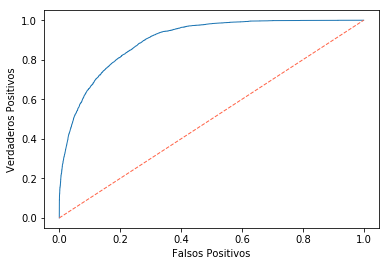

In [95]:
logreg_st(X_mat, y_vec)

### Modelo 2 - Base Completa - Descartando sólo por Valor estadístico 

In [96]:
y_vec = df2['income_bin']  
X_mat = df2.loc[:, ['age', 'collars_bin_others', 'collars_bin_bluecollar', 'workclass_recod_bin_federal_gov', 'workclass_recod_bin_self_employed', 'educ_recod_bin_elementary_school', 'educ_recod_bin_university', 'educ_recod_bin_college', 'civstatus_bin_widowed', 'civstatus_bin_separated', 'civstatus_bin_divorced', 'civstatus_bin_Never_married', 'relationship_bin_other_relative', 'relationship_bin_wife', 'relationship_bin_unmarried', 'relationship_bin_own_child', 'relationship_bin_not_in_family', 'race_bin_other', 'race_bin_aie', 'race_bin_black', 'gender_bin', 'capital_gain', 'capital_loss', 'hours_per_week']]

[[11402   846]
 [ 1632  2238]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12248
           1       0.73      0.58      0.64      3870

    accuracy                           0.85     16118
   macro avg       0.80      0.75      0.77     16118
weighted avg       0.84      0.85      0.84     16118

ROC: 0.8986604362553734


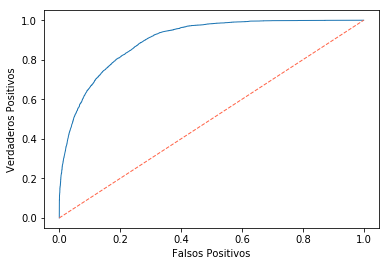

In [97]:
logreg_st(X_mat, y_vec)

### Modelo 3 - Base Completa - Descartando sólo por Valor estadístico y los con bajo coeficiente

In [98]:
y_vec = df2['income_bin']  
X_mat = df2.loc[:, ['collars_bin_others', 'collars_bin_bluecollar', 'workclass_recod_bin_federal_gov', 'educ_recod_bin_elementary_school', 'educ_recod_bin_university', 'educ_recod_bin_college', 'civstatus_bin_widowed', 'civstatus_bin_separated', 'civstatus_bin_divorced', 'civstatus_bin_Never_married', 'relationship_bin_other_relative', 'relationship_bin_wife', 'relationship_bin_unmarried', 'relationship_bin_own_child', 'relationship_bin_not_in_family', 'race_bin_other', 'race_bin_aie', 'race_bin_black', 'gender_bin']]

[[11108  1140]
 [ 1722  2148]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     12248
           1       0.65      0.56      0.60      3870

    accuracy                           0.82     16118
   macro avg       0.76      0.73      0.74     16118
weighted avg       0.81      0.82      0.82     16118

ROC: 0.864688186184909


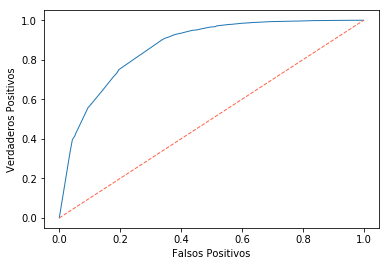

In [99]:
logreg_st(X_mat, y_vec)

El Modelo Saturado fue el que tuvo mejores resultados de los 3 al ver el ROC AUC Score, aunque es marginalmente mejor que el modelo donde descartamos variables por valor estadístico.  Me llama la atención que el úlitmo modelo que se descartan variables con coeficiente muy bajo haya bajado el desempeño en forma importante.
Por tener menos variables elegiría el modelo 2 en este caso para trabajar.

Veamos a continuación el desempeño con la base Dropna.

### Modelo 4 - Base Dropna - Saturado

In [100]:
y_vec = df_dropna2['income_bin']  
X_mat = df_dropna2.loc[:, ['age', 'collars_bin_others', 'collars_bin_bluecollar', 'workclass_recod_bin_unemployed', 'workclass_recod_bin_federal_gov', 'workclass_recod_bin_state_level_gov', 'workclass_recod_bin_self_employed', 'educ_recod_bin_preschool', 'educ_recod_bin_elementary_school', 'educ_recod_bin_university', 'educ_recod_bin_college', 'civstatus_bin_widowed', 'civstatus_bin_separated', 'civstatus_bin_divorced', 'civstatus_bin_Never_married', 'relationship_bin_other_relative', 'relationship_bin_wife', 'relationship_bin_unmarried', 'relationship_bin_own_child', 'relationship_bin_not_in_family', 'race_bin_other', 'race_bin_aie', 'race_bin_api', 'race_bin_black', 'gender_bin', 'region_bin_europe_asia', 'capital_gain', 'capital_loss', 'hours_per_week']]

[[10382   808]
 [ 1593  2141]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     11190
           1       0.73      0.57      0.64      3734

    accuracy                           0.84     14924
   macro avg       0.80      0.75      0.77     14924
weighted avg       0.83      0.84      0.83     14924

ROC: 0.8971975154762195


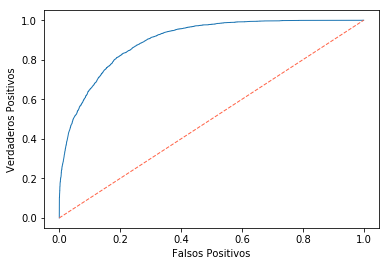

In [101]:
logreg_st(X_mat, y_vec)

### Modelo 5 - Base Dropna - Descartando sólo por Valor estadístico 

In [102]:
y_vec = df_dropna2['income_bin']  
X_mat = df_dropna2.loc[:, ['age', 'collars_bin_others', 'collars_bin_bluecollar', 'workclass_recod_bin_federal_gov', 'workclass_recod_bin_self_employed', 'educ_recod_bin_elementary_school', 'educ_recod_bin_university', 'educ_recod_bin_college', 'civstatus_bin_widowed', 'civstatus_bin_separated', 'civstatus_bin_divorced', 'civstatus_bin_Never_married', 'relationship_bin_other_relative', 'relationship_bin_wife', 'relationship_bin_unmarried', 'relationship_bin_own_child', 'relationship_bin_not_in_family', 'race_bin_aie', 'race_bin_black', 'gender_bin', 'capital_gain', 'capital_loss', 'hours_per_week']]

[[10386   804]
 [ 1589  2145]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     11190
           1       0.73      0.57      0.64      3734

    accuracy                           0.84     14924
   macro avg       0.80      0.75      0.77     14924
weighted avg       0.83      0.84      0.83     14924

ROC: 0.8974427919564343


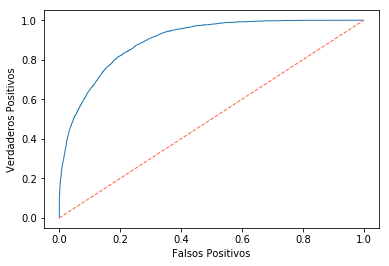

In [103]:
logreg_st(X_mat, y_vec)

### Modelo 6 - Base Dropna - Descartando sólo por Valor estadístico y los con bajo coeficiente

In [104]:
y_vec = df_dropna2['income_bin']  
X_mat = df_dropna2.loc[:, ['collars_bin_others', 'collars_bin_bluecollar', 'workclass_recod_bin_federal_gov', 'educ_recod_bin_elementary_school', 'educ_recod_bin_university', 'educ_recod_bin_college', 'civstatus_bin_separated', 'civstatus_bin_divorced', 'civstatus_bin_Never_married', 'relationship_bin_other_relative', 'relationship_bin_wife', 'relationship_bin_unmarried', 'relationship_bin_own_child', 'relationship_bin_not_in_family', 'race_bin_aie', 'race_bin_black', 'gender_bin']]

[[10190  1000]
 [ 1740  1994]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88     11190
           1       0.67      0.53      0.59      3734

    accuracy                           0.82     14924
   macro avg       0.76      0.72      0.74     14924
weighted avg       0.81      0.82      0.81     14924

ROC: 0.8618292142393187


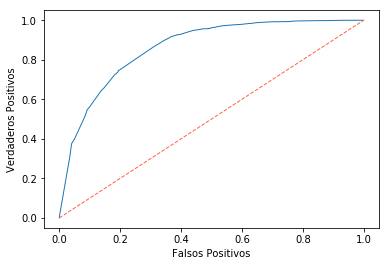

In [105]:
logreg_st(X_mat, y_vec)

En este caso el modelo que descartamos variables por valor estadístico es el que dio mejor, marginalmente en comparación al modelo saturado.

Y al ver modelo con la base completa que descrtando valores nulos, dio mejor el modelo con la base completa, aunque la diferencia es baja.

Finalmente de elegir un modelo, elegiría el Modelo 2, la base completa descartando variables por valor estadístico, el cual entregó un ROC AUC Score de 0.8986604362553734

Probaremos ahora con el Modelo 1 y 2 pero sin normalizar y ver si el modelo mejora.

In [106]:
def logreg(xmat, yvec):
    X_train, X_test, y_train, y_test = train_test_split(xmat, yvec, test_size=.33, random_state=11238)
    modelo = LogisticRegression().fit(X_train, y_train)
    yhat = modelo.predict(X_test)
    m1_confusion = confusion_matrix(y_test, yhat)
    print(m1_confusion)
    print(classification_report(y_test, yhat))
    yhat_pr = modelo.predict_proba(X_test)[:,1]
    false_positive, true_positive, threshold = roc_curve(y_test, yhat_pr)
    plt.plot(false_positive, true_positive, lw=1)
    plt.plot([0,1], linestyle ='--', lw=1, color='tomato')
    plt.ylabel('Verdaderos Positivos')
    plt.xlabel('Falsos Positivos')
    print('ROC: ' + str(roc_auc_score(y_test, yhat_pr)))

### Modelo 7 - Base Completa - Descartando sólo por Valor estadístico NO NORMALIZADO

In [107]:
y_vec = df2['income_bin']  
X_mat = df2.loc[:, ['age', 'collars_bin_others', 'collars_bin_bluecollar', 'workclass_recod_bin_federal_gov', 'workclass_recod_bin_self_employed', 'educ_recod_bin_elementary_school', 'educ_recod_bin_university', 'educ_recod_bin_college', 'civstatus_bin_widowed', 'civstatus_bin_separated', 'civstatus_bin_divorced', 'civstatus_bin_Never_married', 'relationship_bin_other_relative', 'relationship_bin_wife', 'relationship_bin_unmarried', 'relationship_bin_own_child', 'relationship_bin_not_in_family', 'race_bin_other', 'race_bin_aie', 'race_bin_black', 'gender_bin', 'capital_gain', 'capital_loss', 'hours_per_week']]

[[11383   865]
 [ 1635  2235]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12248
           1       0.72      0.58      0.64      3870

    accuracy                           0.84     16118
   macro avg       0.80      0.75      0.77     16118
weighted avg       0.84      0.84      0.84     16118

ROC: 0.8981649696116605


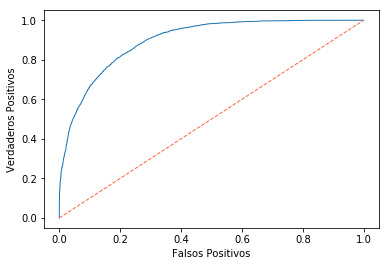

In [108]:
logreg(X_mat, y_vec)

Me da el modelo levemente más bajo que el normalizado que es 0.8986604362553734.

### Modelo 8 - Base Completa - Saturado NO NORMALIZADO

In [109]:
y_vec = df2['income_bin']  
X_mat = df2.loc[:, ['age', 'collars_bin_others', 'collars_bin_bluecollar', 'workclass_recod_bin_unemployed', 'workclass_recod_bin_federal_gov', 'workclass_recod_bin_state_level_gov', 'workclass_recod_bin_self_employed', 'educ_recod_bin_preschool', 'educ_recod_bin_elementary_school', 'educ_recod_bin_university', 'educ_recod_bin_college', 'civstatus_bin_widowed', 'civstatus_bin_separated', 'civstatus_bin_divorced', 'civstatus_bin_Never_married', 'relationship_bin_other_relative', 'relationship_bin_wife', 'relationship_bin_unmarried', 'relationship_bin_own_child', 'relationship_bin_not_in_family', 'race_bin_other', 'race_bin_aie', 'race_bin_api', 'race_bin_black', 'gender_bin', 'region_bin_europe_asia', 'capital_gain', 'capital_loss', 'hours_per_week']]


[[11374   874]
 [ 1640  2230]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12248
           1       0.72      0.58      0.64      3870

    accuracy                           0.84     16118
   macro avg       0.80      0.75      0.77     16118
weighted avg       0.84      0.84      0.84     16118

ROC: 0.8980417727853475


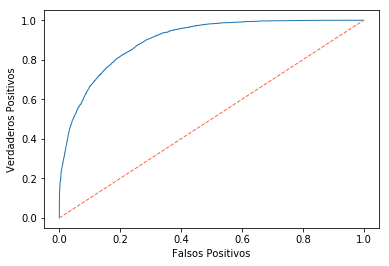

In [110]:
logreg(X_mat, y_vec)

Acá también dio levemente menor que el modelo normalizado que es 0.898790953793859

Por ende el modelo normalizado no entrega en este caso un mejor modelo que al no normalizar, aunque la diferencia es leve.